<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Elizabeth Ramírez Z.
- Nombre de alumno 2: Lucas Orellana J.


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/ElLuquitas/MDS7202-labs)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [5]:
# Paso 1: Cargar la base de datos
file_path = 'energia_homero.csv'  # Asegúrate de que el archivo esté en esta ruta
df = pd.read_csv(file_path)

df.head()


,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


In [6]:
# Paso 2: Transformar la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Paso 3: Visualizar el consumo de energía a lo largo del tiempo
fig = px.scatter(df, x='date', y='Energy_kWh', title='Consumo de Energía a lo Largo del Tiempo',
              labels={'date': 'Fecha', 'Energy_kWh': 'Consumo de Energía (kWh)'})
fig.show()



## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer


In [8]:
# Holdout

df['set'] = np.where(df.date >= pd.Timestamp('2020-03-01'), 'Test', 'Train')

train = df[df['set'] == 'Train'].copy()
test = df[df['set'] == 'Test'].copy()

target = 'Energy_kWh'

X_train = train.drop(columns = ['set'])
y_train = train[target].copy()

X_test = test.drop(columns = ['set'])
y_test = test[target].copy()

print(f'% destinado a train: {len(train) / len(df):.2f}')
print(f'% destinado a test: {len(test) / len(df):.2f}')

X_train

% destinado a train: 0.91
% destinado a test: 0.09


,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195
...,...,...
1364,2020-02-25,9.630
1365,2020-02-26,10.203
1366,2020-02-27,12.040
1367,2020-02-28,10.771


In [9]:
train.head()

,date,Energy_kWh,set
0,2016-06-01,29.691,Train
1,2016-06-02,28.789,Train
2,2016-06-03,19.247,Train
3,2016-06-04,22.883,Train
4,2016-06-05,25.195,Train


In [10]:
test.head()

,date,Energy_kWh,set
1369,2020-03-01,11.372,Test
1370,2020-03-02,10.883,Test
1371,2020-03-03,9.233,Test
1372,2020-03-04,10.178,Test
1373,2020-03-05,8.434,Test


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):

        self.init_date = None

    def fit(self, X, y=None):

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

        return self

    def transform(self, X):

        X = X.copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

    def fit_transform(self, X, y=None):

        X = X.copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

transformer = TimeTransformer()
transformer.fit_transform(X_train) # notar que sólo usa la variable "date"

,trend
0,0
1,1
2,2
3,3
4,4
...,...
1364,1364
1365,1365
1366,1366
1367,1367


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

Pipeline_trend = Pipeline([
    ('time_features', TimeTransformer()),
    ('ols', LinearRegression())
])

Pipeline_trend.fit(X_train, y_train)
train_pred = Pipeline_trend.predict(X_train)
test_pred = Pipeline_trend.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

y_pred.shape

(1498,)

In [13]:
# plot
fig = px.scatter(df, x=df.date, y=target, title='Forecast de consumo energia', color='set')
fig.add_scatter(x=df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

In [14]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 10.57
MAE Test: 8.66


In [15]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df.date, y=error, title='Error en la predicción', color = df.set)
fig.show()

 **¿Hay un comportamiento estacional en la serie?**
 
 Sí, hay un comportamiento estacional en la serie, ya que se observa la figura original de consumo de energía, se ve que hay menores consumos de energía desde noviembre hasta abril y hay mayor consumo en junio, julio, agosto. La gráfica anterior muestra el error en la predicción, es decir, la diferencia entre lo predicho por el modelo lineal y el valor observado en el dataset. Los errores también muestran ese componente cíclico, por lo que un modelo lineal no es suficiente para hacer predicciones certeras en este problema que tiene un componente estacional. 

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier

transformer = TimeTransformer(n = 4, p = 365)
transformer.fit_transform(X_train)

,trend,fourier_0,fourier_1,fourier_2,fourier_3,fourier_4,fourier_5,fourier_6,fourier_7
0,0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,1,0.017213,0.999852,0.034422,0.999407,0.051620,0.998667,0.068802,0.997630
2,2,0.034422,0.999407,0.068802,0.997630,0.103102,0.994671,0.137279,0.990532
3,3,0.051620,0.998667,0.103102,0.994671,0.154309,0.988023,0.205104,0.978740
4,4,0.068802,0.997630,0.137279,0.990532,0.205104,0.978740,0.271958,0.962309
...,...,...,...,...,...,...,...,...,...
1364,1364,-0.996659,-0.081676,0.162807,-0.986658,0.970064,0.242850,-0.321270,0.946988
1365,1365,-0.997917,-0.064508,0.128748,-0.991677,0.981306,0.192452,-0.255353,0.966848
1366,1366,-0.998880,-0.047321,0.094537,-0.995521,0.989932,0.141540,-0.188227,0.982126
1367,1367,-0.999546,-0.030120,0.060213,-0.998186,0.995919,0.090252,-0.120208,0.992749


**Definir p y n para la serie de Fourier**


In [17]:
# definir Pipeline
Pipeline_seasonal = Pipeline([
    ('time_features', TimeTransformer(n =6, p = 365)),
    ('ols', LinearRegression())
])

# entrenar y predecir
Pipeline_seasonal.fit(X_train, y_train)
train_pred = Pipeline_seasonal.predict(X_train)
test_pred = Pipeline_seasonal.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

In [18]:
# plot
fig = px.scatter(df, x=df.date, y=target, title='Forecast de consumo de energía', color='set')
fig.add_scatter(x=df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

In [19]:
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 5.34
MAE Test: 4.49


In [20]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df.date, y=error, title='Error en la predicción', color = df.set)
fig.show()

**Comentario**
El error tiene ciclicidad, ya que no constante a lo largo de los años. Esto se debe a que falta agregar algo al modelo para que considere esa ciclicidad. 


## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [21]:
#!pip install prophet

In [22]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

/home/lucas/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



**Respuesta:**

In [23]:
train = train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
train.head()

,ds,y,set
0,2016-06-01,29.691,Train
1,2016-06-02,28.789,Train
2,2016-06-03,19.247,Train
3,2016-06-04,22.883,Train
4,2016-06-05,25.195,Train


In [24]:
#1. Renombrar variables
test = test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test.head()


,ds,y,set
1369,2020-03-01,11.372,Test
1370,2020-03-02,10.883,Test
1371,2020-03-03,9.233,Test
1372,2020-03-04,10.178,Test
1373,2020-03-05,8.434,Test


In [25]:
#Número de dias del periodo de train y test
num_filas_train = train.shape[0]
print(num_filas_train)


1369


In [26]:

num_filas_test = test.shape[0]
print(num_filas_test)

129


In [27]:
#Cree y ajuste el modelo Prophet con sus datos de entrenamiento. 
m = Prophet()
m.fit(train)

23:54:21 - cmdstanpy - INFO - Chain [1] start processing
23:54:22 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
#Luego prepare el dataset de predicciones con su set de prueba y realice las predicciones.
future = test[['ds']]
future.head()

,ds
1369,2020-03-01
1370,2020-03-02
1371,2020-03-03
1372,2020-03-04
1373,2020-03-05


In [29]:
future = m.make_future_dataframe(periods=129)# son 129 dias, porque el set de test es de 
future.tail()

,ds
1493,2020-07-03
1494,2020-07-04
1495,2020-07-05
1496,2020-07-06
1497,2020-07-07


In [30]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01,29.900526,25.549192,42.609282,29.900526,29.900526,4.095098,4.095098,4.095098,-0.531118,-0.531118,-0.531118,4.626216,4.626216,4.626216,0.0,0.0,0.0,33.995624
1,2016-06-02,29.867931,25.606438,44.060849,29.867931,29.867931,4.752546,4.752546,4.752546,-0.426451,-0.426451,-0.426451,5.178996,5.178996,5.178996,0.0,0.0,0.0,34.620477
2,2016-06-03,29.835336,25.697776,43.250857,29.835336,29.835336,5.084367,5.084367,5.084367,-0.667277,-0.667277,-0.667277,5.751644,5.751644,5.751644,0.0,0.0,0.0,34.919703
3,2016-06-04,29.802741,28.802267,46.303068,29.802741,29.802741,7.412045,7.412045,7.412045,1.076435,1.076435,1.076435,6.335610,6.335610,6.335610,0.0,0.0,0.0,37.214786
4,2016-06-05,29.770146,29.320941,47.266849,29.770146,29.770146,8.605106,8.605106,8.605106,1.682788,1.682788,1.682788,6.922318,6.922318,6.922318,0.0,0.0,0.0,38.375252


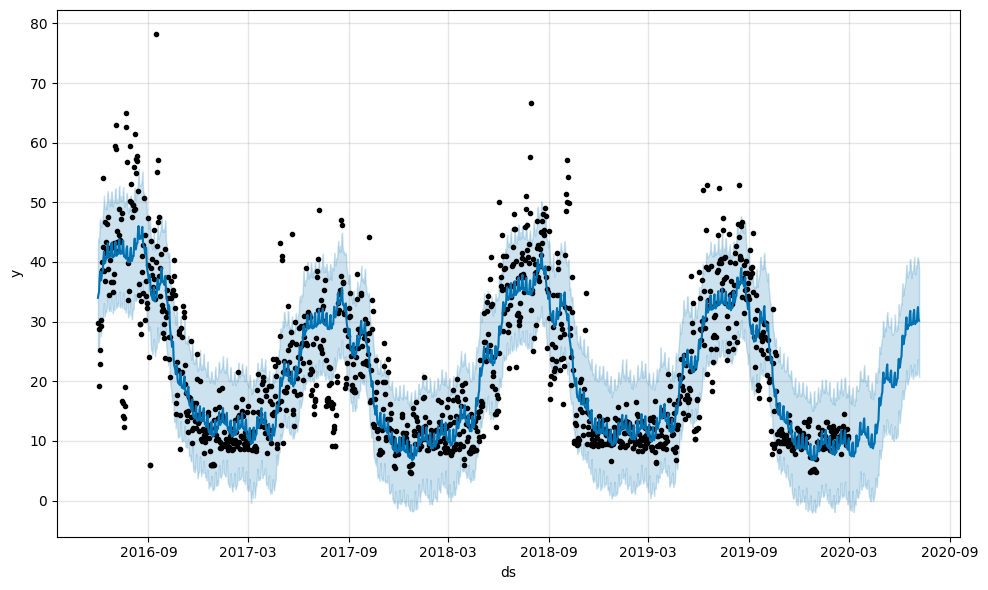

In [31]:
fig1 = m.plot(forecast)

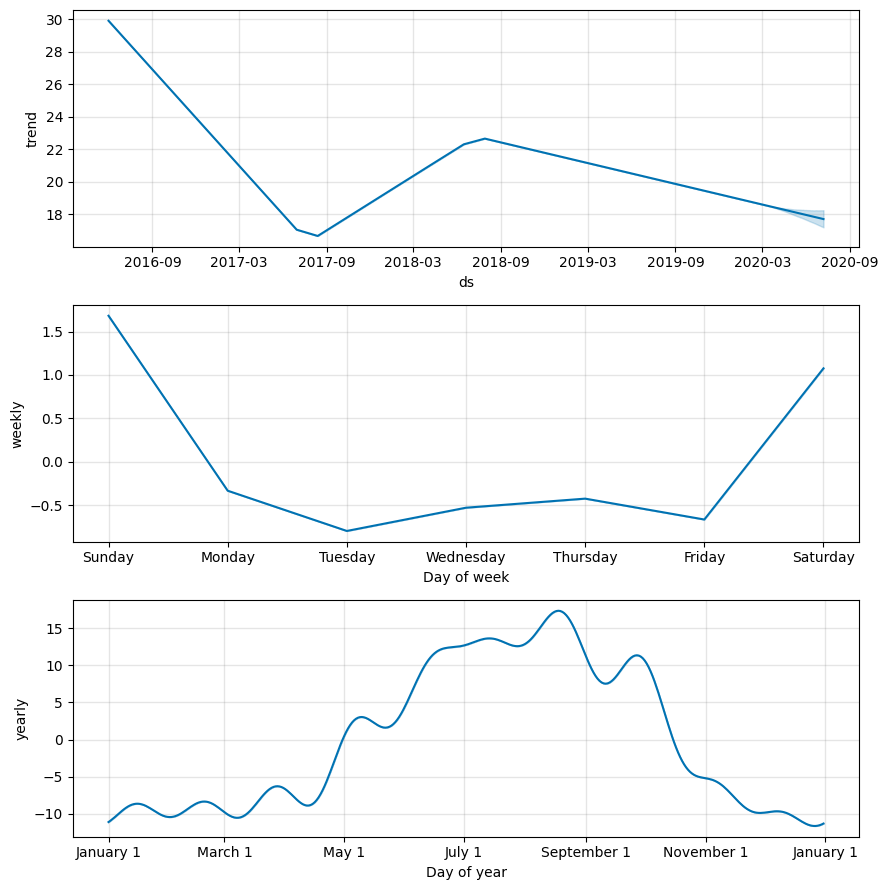

In [32]:
fig2=m.plot_components(forecast)

**Calcule el MAE de la predicción en el conjunto de entrenamiento y de prueba.**

In [33]:
# Extraer los primeros 1369 valores de la columna 'yhat'
train_pred_prophet = forecast['yhat'].iloc[:1369].values

# Extraer los últimos 129 valores de la columna 'yhat'
test_pred_prophet= forecast['yhat'].iloc[-129:].values

In [34]:
mae_train_prophet = mean_absolute_error(y_train, train_pred_prophet)
mae_test_prophet = mean_absolute_error(y_test, test_pred_prophet)

print(f'MAE Train: {mae_train_prophet:.2f}')
print(f'MAE Test: {mae_test_prophet:.2f}')

MAE Train: 4.82
MAE Test: 4.92


**Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo.**

In [35]:
# calculamos errores de train y test
error_train_prophet = y_train - train_pred_prophet
error_test_prophet = y_test - test_pred_prophet
error_prophet = pd.concat([error_train_prophet, error_test_prophet])

# graficamos errores
fig_error_prophet = px.line(x = df.date, y=error_prophet, title='Error en la predicción', color = df.set)
fig_error_prophet.show()

**¿Hay un comportamiento estacional en la serie?**

Si hay un comportamiento estacional. Es más leve que antes, pero aún tiene algo de comportamiento estacional. Claramente mejoro con respecto a la parte de la regresión lineal, pero aun se ve un ciclo en cada año en el error. 

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [36]:
#Cargar datos y agregarlas al set de train y test
# Paso 1: Cargar la base de datos
file_path2 = 'datos_frink.csv'  # Asegúrate de que el archivo esté en esta ruta
df2 = pd.read_csv(file_path2)
df2.head()


,date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min
0,2016-06-01,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7
1,2016-06-02,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7
2,2016-06-03,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7
3,2016-06-04,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7
4,2016-06-05,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7


In [37]:
# Paso 2: Transformar la columna 'date' a formato datetime
df2['date'] = pd.to_datetime(df2['date'])
print(df2['date'].head())

0   2016-06-01
1   2016-06-02
2   2016-06-03
3   2016-06-04
4   2016-06-05
Name: date, dtype: datetime64[ns]


In [38]:
df_copia = df.copy()
datos = df_copia.merge(df2, on='date', how="inner")
datos.head()

,date,Energy_kWh,set,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min
0,2016-06-01,29.691,Train,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7
1,2016-06-02,28.789,Train,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7
2,2016-06-03,19.247,Train,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7
3,2016-06-04,22.883,Train,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7
4,2016-06-05,25.195,Train,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7


In [39]:
# Sacar la columna date
datos_sin_fecha = datos.drop(columns=['date', "set"])
datos_sin_fecha.head()


,Energy_kWh,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min
0,29.691,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7
1,28.789,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7
2,19.247,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7
3,22.883,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7
4,25.195,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7


/tmp/ipykernel_10789/1760004628.py:23: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



<Figure size 1800x1000 with 0 Axes>

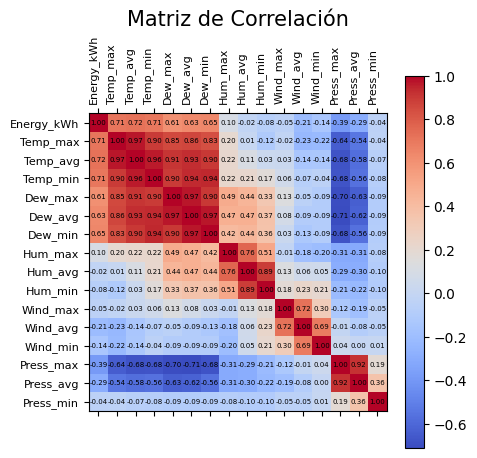

In [40]:

# Calcular la matriz de correlación
matriz_correlacion = datos_sin_fecha.corr()

# Configurar el tamaño de la figura (ajustar el tamaño aquí)
plt.figure(figsize=(18, 10))  # Tamaño mayor

# Crear el mapa de colores (colormap)
cax = plt.matshow(matriz_correlacion, cmap='coolwarm')

# Añadir la barra de color
plt.colorbar(cax)

# Añadir etiquetas a los ejes
plt.xticks(ticks=np.arange(len(matriz_correlacion.columns)), labels=matriz_correlacion.columns, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(matriz_correlacion.columns)), labels=matriz_correlacion.columns, fontsize=8)

# Añadir los valores de correlación en la matriz
for (i, j), val in np.ndenumerate(matriz_correlacion):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=5)  # Aumentar tamaño de fuente

# Personalizar el gráfico
plt.title('Matriz de Correlación', fontsize=15)
plt.tight_layout()  # Ajustar el layout

# Mostrar el gráfico
plt.show()

**Variables seleccionadas**

Se eligieron las variables con mayor correlación de los 5 grupos de variables.

- Temp_avg
- Dew_min
- Hum_max
- Wind_avg
- Press_max

**Cree el modelo Prophet**

In [41]:
# Renombrar la columna 'date' en el DataFrame original antes de crear 'regressors'
df2.rename(columns={'date': 'ds'}, inplace=True)

# Crear el DataFrame 'regressors'
regressors = df2.loc[:1368, ["ds", 'Temp_avg', 'Dew_min', 'Hum_max', 'Wind_avg', 'Press_max']]

# Crear el DataFrame 'regressors_last' seleccionando las últimas 129 filas
regressors_test = df2.loc[len(df2) - 129:, ["ds", 'Temp_avg', 'Dew_min', 'Hum_max', 'Wind_avg', 'Press_max']]

# Verificar el nuevo DataFrame
print(regressors.head())

          ds  Temp_avg  Dew_min  Hum_max  Wind_avg  Press_max
0 2016-06-01      74.8       66      100       9.5       29.8
1 2016-06-02      71.2       66      100       7.8       29.8
2 2016-06-03      72.1       68      100       4.7       29.8
3 2016-06-04      71.2       66      100       7.0       29.8
4 2016-06-05      73.8       68      100       7.7       29.7


In [42]:
# Concatenar las filas seleccionadas al DataFrame 'train'
train = train.merge(regressors, on='ds', how="inner")

# Verificar el resultado
print(train.head())


          ds       y    set  Temp_avg  Dew_min  Hum_max  Wind_avg  Press_max
0 2016-06-01  29.691  Train      74.8       66      100       9.5       29.8
1 2016-06-02  28.789  Train      71.2       66      100       7.8       29.8
2 2016-06-03  19.247  Train      72.1       68      100       4.7       29.8
3 2016-06-04  22.883  Train      71.2       66      100       7.0       29.8
4 2016-06-05  25.195  Train      73.8       68      100       7.7       29.7


In [43]:
# Concatenar las filas seleccionadas al DataFrame 'train'
test = test.merge(regressors_test, on='ds', how="inner")

# Verificar el resultado
print(test.head())


          ds       y   set  Temp_avg  Dew_min  Hum_max  Wind_avg  Press_max
0 2020-03-01  11.372  Test      67.1       55       90      11.1       30.0
1 2020-03-02  10.883  Test      70.8       62       93       6.8       29.8
2 2020-03-03   9.233  Test      72.6       65       93       6.6       29.7
3 2020-03-04  10.178  Test      67.4       49       97      11.3       29.9
4 2020-03-05   8.434  Test      62.0       35       77      11.9       30.2


In [44]:
m = Prophet()

# Agregar regresores
m.add_regressor('Temp_avg')
m.add_regressor('Dew_min')
m.add_regressor('Hum_max')
m.add_regressor('Wind_avg')
m.add_regressor('Press_max')

In [45]:
m.fit(train)

23:54:25 - cmdstanpy - INFO - Chain [1] start processing
23:54:25 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = m.make_future_dataframe(periods=129)# son 129 dias, porque el set de test es de 
future.head()
future.shape

(1498, 1)

In [47]:
future['Temp_avg'] = df2['Temp_avg']
future['Dew_min'] = df2['Dew_min']
future['Hum_max'] = df2['Hum_max']
future['Wind_avg'] = df2['Wind_avg']
future['Press_max'] = df2['Press_max']
future.head()

,ds,Temp_avg,Dew_min,Hum_max,Wind_avg,Press_max
0,2016-06-01,74.8,66,100,9.5,29.8
1,2016-06-02,71.2,66,100,7.8,29.8
2,2016-06-03,72.1,68,100,4.7,29.8
3,2016-06-04,71.2,66,100,7.0,29.8
4,2016-06-05,73.8,68,100,7.7,29.7


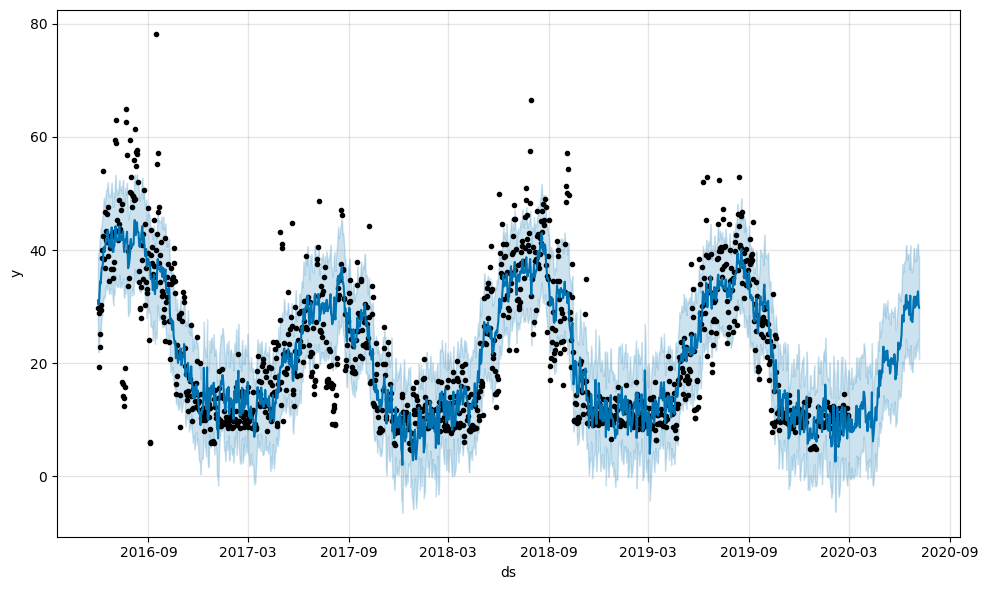

In [48]:
forecast = m.predict(future)
fig1=m.plot(forecast)

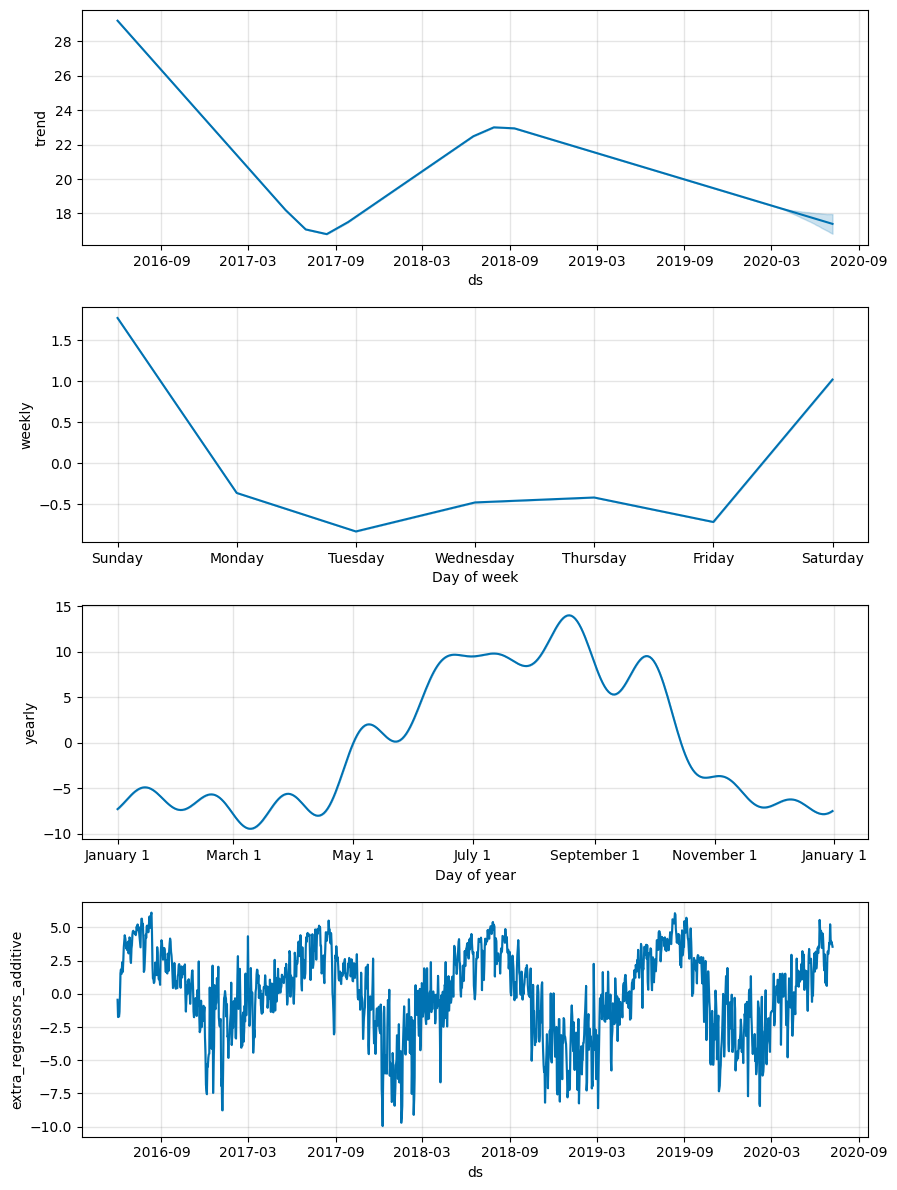

In [49]:
fig2 = m.plot_components(forecast)

In [50]:
# Extraer los primeros 1369 valores de la columna 'yhat'
train_pred_prophet2 = forecast['yhat'].iloc[:1369].values

# Extraer los últimos 129 valores de la columna 'yhat'
test_pred_prophet2= forecast['yhat'].iloc[-129:].values


mae_train_prophet2 = mean_absolute_error(y_train, train_pred_prophet2)
mae_test_prophet2 = mean_absolute_error(y_test, test_pred_prophet2)

print(f'MAE Train: {mae_train_prophet2:.2f}')
print(f'MAE Test: {mae_test_prophet2:.2f}')

MAE Train: 4.77
MAE Test: 4.54


In [51]:
# calculamos errores de train y test
error_train_prophet2 = y_train - train_pred_prophet2
error_test_prophet2 = y_test - test_pred_prophet2
error_prophet2 = pd.concat([error_train_prophet2, error_test_prophet2])

# graficamos errores
fig_error_prophet = px.line(x = df.date, y=error_prophet2, title='Error en la predicción', color = df.set)
fig_error_prophet.show()

**¿Hay un comportamiento estacional en la serie?**
Se observa un comportamiento estacional en la serie de los regresores. Se ven ciclos. 

**¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero?**

Deberían influir de alguna manera algunas variables más que otras. Por ejemplo, al ver las correlaciones, la temperatura las  mayores correlaciones. 

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

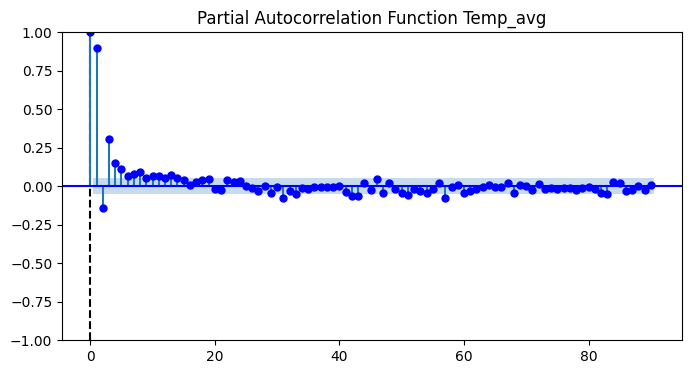

In [52]:
#Lag
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

Temp_avg = df2['Temp_avg']
Dew_avg= df2['Dew_avg']
Hum_avg = df2['Hum_avg']
Wind_avg = df2['Wind_avg']
Press_avg = df2['Press_avg']


fig, ax = plt.subplots(figsize=(8, 4))
ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plot_pacf(Temp_avg, lags=90, alpha = 0.05, ax = ax, color="blue") # 5% de significancia
plt.title('Partial Autocorrelation Function Temp_avg')
#ax.set_xticks(range(0, 21, 3))
plt.show()

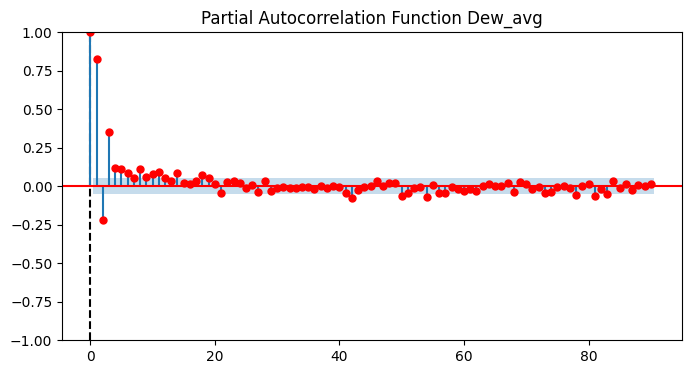

In [53]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plot_pacf(Dew_avg, lags=90, alpha = 0.05, ax = ax, color="red") # 5% de significancia
plt.title('Partial Autocorrelation Function Dew_avg')
#ax.set_xticks(range(0, 21, 3))
plt.show()

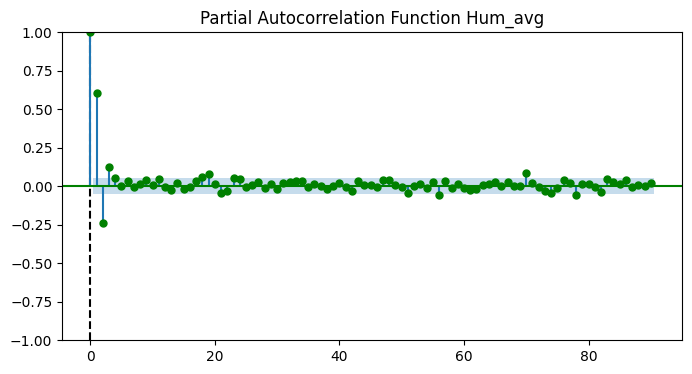

In [54]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plot_pacf(Hum_avg, lags=90, alpha = 0.05, ax = ax, color="green") # 5% de significancia
plt.title('Partial Autocorrelation Function Hum_avg')
#ax.set_xticks(range(0, 21, 3))
plt.show()

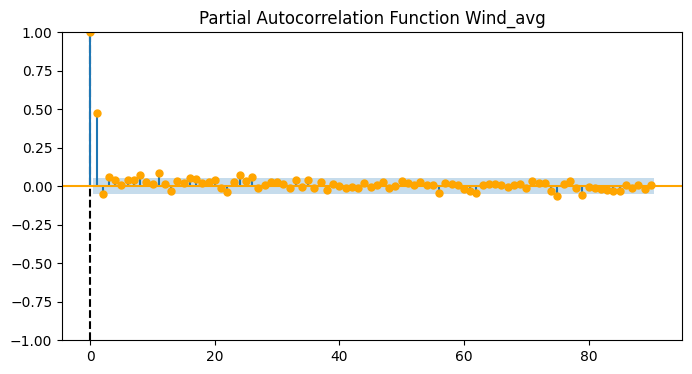

In [55]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plot_pacf(Wind_avg, lags=90, alpha = 0.05, ax = ax, color="orange") # 5% de significancia
plt.title('Partial Autocorrelation Function Wind_avg')
#ax.set_xticks(range(0, 21, 3))
plt.show()

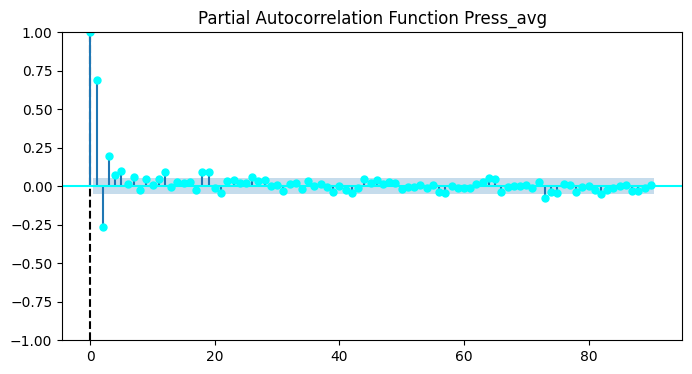

In [56]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plot_pacf(Press_avg, lags=90, alpha = 0.05, ax = ax, color="cyan") # 5% de significancia
# Agregar la línea entrecortada negra en x=0

plt.title('Partial Autocorrelation Function Press_avg')
#ax.set_xticks(range(0, 21, 3))
plt.show()

**Cantidad de rezagos que se consideraran**

- Temp_avg = 4
- Dew_avg= 4
- Hum_avg = 3
- Wind_avg = 2
- Press_avg = 4


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import numpy as np

# Función para crear los lags
def get_lags(X, n):
    lag_features = pd.DataFrame(index=X.index)
    lag_features['lag'] = X.shift(n)
    return lag_features[['lag']]

# Función para redondear a 1 decimal
def round_to_one_decimal(X):
    return np.round(X, 1)



In [58]:
# Crear el transformador de lags con "n" lag
LagsTransformer = FunctionTransformer(lambda X: get_lags(X, n=4))

# Crear el transformador para redondear
RoundTransformer = FunctionTransformer(round_to_one_decimal)

# Definir el pipeline
lag_pipeline = Pipeline([
    ('make_lags', LagsTransformer),  # Crear lags
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos con la media
    ('round', RoundTransformer)  # Redondear a 1 decimal
])

# Aplicar el pipeline a temperatura
lag_temp = lag_pipeline.fit_transform(Temp_avg)

# Mostrar los resultados
print(lag_temp[:10])  # Ver los primeros 10 resultados

[[71.2]
 [71.2]
 [71.2]
 [71.2]
 [74.8]
 [71.2]
 [72.1]
 [71.2]
 [73.8]
 [76.6]]


In [59]:
#Dew_avg. Usaremos 4 lag 
# Aplicar el pipeline a temperatura
lag_dew = lag_pipeline.fit_transform(Dew_avg)

# Mostrar los resultados
print(lag_dew[:10])  # Ver los primeros 10 resultados

[[61.7]
 [61.7]
 [61.7]
 [61.7]
 [71.4]
 [70.3]
 [70. ]
 [70. ]
 [70. ]
 [70.8]]


In [60]:
#Press. Usaremos 4 lag 
# Aplicar el pipeline a temperatura
lag_press = lag_pipeline.fit_transform(Press_avg)

# Mostrar los resultados
print(lag_press[:10])  # Ver los primeros 10 resultados

[[29.9]
 [29.9]
 [29.9]
 [29.9]
 [29.8]
 [29.8]
 [29.8]
 [29.7]
 [29.7]
 [29.7]]


In [61]:
#Hum avg. Usaremos 3 lag
# Crear el transformador de lags con "n" lag
LagsTransformer = FunctionTransformer(lambda X: get_lags(X, n=3))

# Crear el transformador para redondear
RoundTransformer = FunctionTransformer(round_to_one_decimal)

# Definir el pipeline
lag_pipeline = Pipeline([
    ('make_lags', LagsTransformer),  # Crear lags
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos con la media
    ('round', RoundTransformer)  # Redondear a 1 decimal
])

# Aplicar el pipeline a temperatura
lag_hum = lag_pipeline.fit_transform(Hum_avg)

# Mostrar los resultados
print(lag_hum[:10])  # Ver los primeros 10 resultados

[[74.5]
 [74.5]
 [74.5]
 [89.4]
 [96.8]
 [93.6]
 [96.1]
 [88.7]
 [84. ]
 [75.2]]


In [62]:
#Wind avg. Usaremos 2 lag
# Crear el transformador de lags con "n" lag
LagsTransformer = FunctionTransformer(lambda X: get_lags(X, n=2))

# Crear el transformador para redondear
RoundTransformer = FunctionTransformer(round_to_one_decimal)

# Definir el pipeline
lag_pipeline = Pipeline([
    ('make_lags', LagsTransformer),  # Crear lags
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos con la media
    ('round', RoundTransformer)  # Redondear a 1 decimal
])

# Aplicar el pipeline a temperatura
lag_wind = lag_pipeline.fit_transform(Wind_avg)

# Mostrar los resultados
print(lag_wind[:10])  # Ver los primeros 10 resultados

[[7.8]
 [7.8]
 [9.5]
 [7.8]
 [4.7]
 [7. ]
 [7.7]
 [4.7]
 [5. ]
 [4.8]]


In [63]:
#Veificar dimensiones
lag_wind.shape

(1498, 1)

**Incluir como variables en los conjuntos train y test**

In [64]:

# Crear el DataFrame con los arrays
lags = pd.DataFrame({
    "ds": df2["ds"],
    'Lag_Temp': lag_temp.flatten(),  # Asegurarse de que sean arrays 1D
    'Lag_Wind': lag_wind.flatten(),
    'Lag_Press': lag_press.flatten(),
    'Lag_Hum': lag_hum.flatten(),
    'Lag_Dew': lag_dew.flatten()
})

# Ver las primeras filas del DataFrame
print(lags.head())

          ds  Lag_Temp  Lag_Wind  Lag_Press  Lag_Hum  Lag_Dew
0 2016-06-01      71.2       7.8       29.9     74.5     61.7
1 2016-06-02      71.2       7.8       29.9     74.5     61.7
2 2016-06-03      71.2       9.5       29.9     74.5     61.7
3 2016-06-04      71.2       7.8       29.9     89.4     61.7
4 2016-06-05      74.8       4.7       29.8     96.8     71.4


In [65]:
lags.shape

(1498, 6)

In [66]:
# Crear DataFrame lag_train con las primeras 1369 filas
lag_train = lags.iloc[:1369].copy()

# Crear DataFrame lag_test con las últimas 129 filas
lag_test = lags.iloc[-129:].copy()

# Verificar las formas de los DataFrames
print(lag_train.shape)
print(lag_test.shape)

(1369, 6)
(129, 6)


In [67]:
# Concatenar las filas seleccionadas al DataFrame 'train'
train = train.merge(lag_train, on='ds', how="inner")

# Verificar el resultado
print(train.head())
train.shape

          ds       y    set  Temp_avg  Dew_min  Hum_max  Wind_avg  Press_max  \
0 2016-06-01  29.691  Train      74.8       66      100       9.5       29.8   
1 2016-06-02  28.789  Train      71.2       66      100       7.8       29.8   
2 2016-06-03  19.247  Train      72.1       68      100       4.7       29.8   
3 2016-06-04  22.883  Train      71.2       66      100       7.0       29.8   
4 2016-06-05  25.195  Train      73.8       68      100       7.7       29.7   

   Lag_Temp  Lag_Wind  Lag_Press  Lag_Hum  Lag_Dew  
0      71.2       7.8       29.9     74.5     61.7  
1      71.2       7.8       29.9     74.5     61.7  
2      71.2       9.5       29.9     74.5     61.7  
3      71.2       7.8       29.9     89.4     61.7  
4      74.8       4.7       29.8     96.8     71.4  


(1369, 13)

In [68]:
# Concatenar las filas seleccionadas al DataFrame 'train'
test = test.merge(lag_test, on='ds', how="inner")

# Verificar el resultado
print(test.head())
test.shape

          ds       y   set  Temp_avg  Dew_min  Hum_max  Wind_avg  Press_max  \
0 2020-03-01  11.372  Test      67.1       55       90      11.1       30.0   
1 2020-03-02  10.883  Test      70.8       62       93       6.8       29.8   
2 2020-03-03   9.233  Test      72.6       65       93       6.6       29.7   
3 2020-03-04  10.178  Test      67.4       49       97      11.3       29.9   
4 2020-03-05   8.434  Test      62.0       35       77      11.9       30.2   

   Lag_Temp  Lag_Wind  Lag_Press  Lag_Hum  Lag_Dew  
0      49.8       4.9       30.2     51.3     28.0  
1      46.6       7.8       30.3     50.8     27.3  
2      54.7      11.1       30.2     59.5     34.3  
3      60.0       6.8       30.1     77.5     44.0  
4      67.1       6.6       29.9     80.4     59.7  


(129, 13)

**Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo**

In [69]:
m = Prophet()
# Agregar regresores
m.add_regressor('Temp_avg')
m.add_regressor('Dew_min')
m.add_regressor('Hum_max')
m.add_regressor('Wind_avg')
m.add_regressor('Press_max')
m.add_regressor('Lag_Temp')
m.add_regressor('Lag_Wind')
m.add_regressor('Lag_Press')
m.add_regressor('Lag_Hum')
m.add_regressor('Lag_Dew')

m.fit(train)

23:54:31 - cmdstanpy - INFO - Chain [1] start processing
23:54:31 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
future = m.make_future_dataframe(periods=129)# son 129 dias, porque el set de test es de 
future.head()
future.shape


(1498, 1)

In [71]:

future['Temp_avg'] = df2['Temp_avg']
future['Dew_min'] = df2['Dew_min']
future['Hum_max'] = df2['Hum_max']
future['Wind_avg'] = df2['Wind_avg']
future['Press_max'] = df2['Press_max']
future['Lag_Temp'] = lags['Lag_Temp']
future['Lag_Wind'] = lags['Lag_Wind']
future['Lag_Press'] = lags['Lag_Press']
future['Lag_Hum'] = lags['Lag_Hum']
future['Lag_Dew'] = lags['Lag_Dew']
future.head()



,ds,Temp_avg,Dew_min,Hum_max,Wind_avg,Press_max,Lag_Temp,Lag_Wind,Lag_Press,Lag_Hum,Lag_Dew
0,2016-06-01,74.8,66,100,9.5,29.8,71.2,7.8,29.9,74.5,61.7
1,2016-06-02,71.2,66,100,7.8,29.8,71.2,7.8,29.9,74.5,61.7
2,2016-06-03,72.1,68,100,4.7,29.8,71.2,9.5,29.9,74.5,61.7
3,2016-06-04,71.2,66,100,7.0,29.8,71.2,7.8,29.9,89.4,61.7
4,2016-06-05,73.8,68,100,7.7,29.7,74.8,4.7,29.8,96.8,71.4


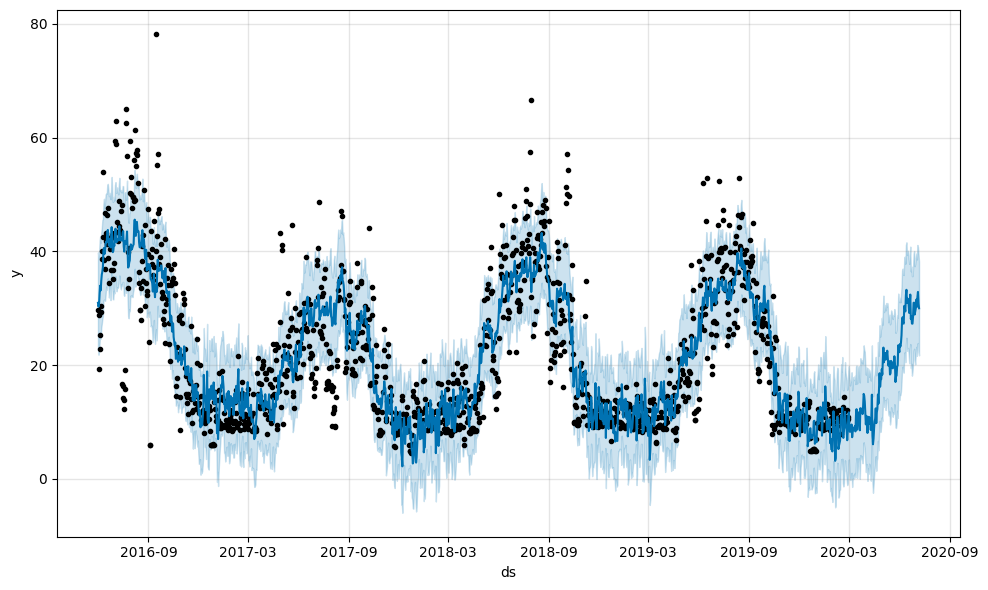

In [72]:
forecast = m.predict(future)
fig1=m.plot(forecast)

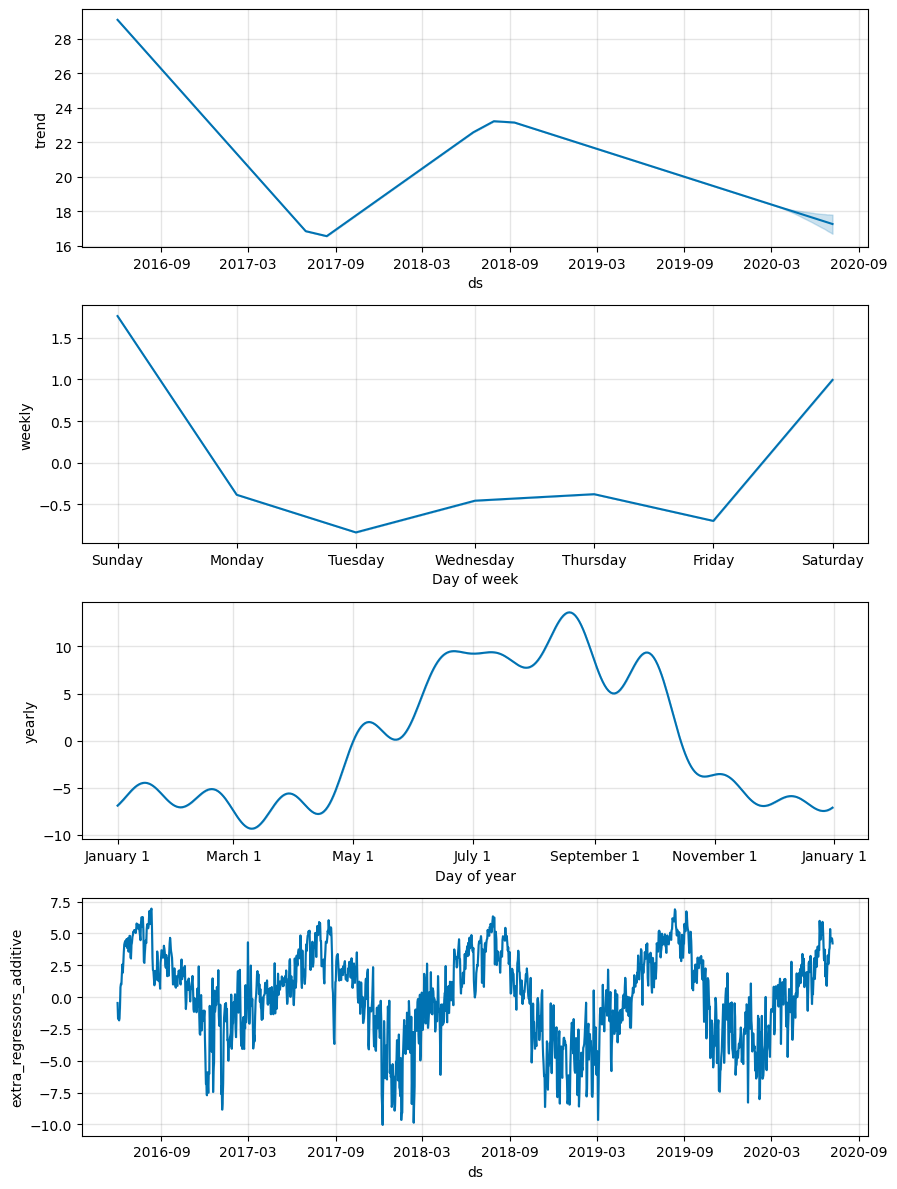

In [73]:
fig2 = m.plot_components(forecast)

In [74]:
# Extraer los primeros 1369 valores de la columna 'yhat'
train_pred_prophet3 = forecast['yhat'].iloc[:1369].values

# Extraer los últimos 129 valores de la columna 'yhat'
test_pred_prophet3= forecast['yhat'].iloc[-129:].values


mae_train_prophet3 = mean_absolute_error(y_train, train_pred_prophet3)
mae_test_prophet3 = mean_absolute_error(y_test, test_pred_prophet3)

print(f'MAE Train: {mae_train_prophet3:.2f}')
print(f'MAE Test: {mae_test_prophet3:.2f}')

MAE Train: 4.75
MAE Test: 4.58


In [75]:
# calculamos errores de train y test
error_train_prophet3 = y_train - train_pred_prophet3
error_test_prophet3 = y_test - test_pred_prophet3
error_prophet3 = pd.concat([error_train_prophet3, error_test_prophet3])

# graficamos errores
fig_error_prophet = px.line(x = df.date, y=error_prophet3, title='Error en la predicción', color = df.set)
fig_error_prophet.show()

**¿Hay un comportamiento estacional en la serie?**
El comportamiento estacional en la serie del error ha mejorado, ya que ahora se ve mucho menos que en los primeros ejercicios realizados. Se nota algo de la estacionalidad en el año 2017, pero en los otros años ya no se observa con tanta claridad como antes. 

**¿Como afecta la inclusión de los lags en el desempeño del modelo?**
Pareciera ser que ha ayudado, ya que ha mejorado en algo la estacionalidad, ya que se observa menos la ciclicidad que se observaba antes. 

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [76]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [77]:
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9],
}

In [78]:
param_grid

{'changepoint_prior_scale': [0.01, 0.1, 0.5],
 'seasonality_prior_scale': [0.1, 1.0, 10.0],
 'seasonality_mode': ['additive', 'multiplicative'],
 'changepoint_range': [0.8, 0.9]}

In [79]:
# Lista de variables exógenas
features = ['Temp_avg', 'Dew_min', 'Hum_max', 'Wind_avg', 'Press_max', "Lag_Temp","Lag_Wind", "Lag_Press", "Lag_Hum", "Lag_Dew"]

# Llamar a la función para optimizar Prophet

#Función que recibe como entrada:
# -df: data entrenamiento.
#-df_to_pred: data a predecir (test).
# -features: lista de variables exógenas.
#-param_grid: grilla de hiperparámetros.

tuning_results, best_params = optimize_prophet(train, test, features, param_grid)

# Mostrar los resultados de la optimización
print("Mejores parámetros encontrados:")
print(best_params)

print("\nResultados del tuning:")
print(tuning_results.head())

Tuning Prophet parameters:   0%|          | 0/36 [00:00<?, ?it/s]

Tuning Prophet parameters: 100%|██████████| 36/36 [00:32<00:00,  1.11it/s]

Mejores parámetros encontrados:
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}

Resultados del tuning:
    changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
2                      0.01                      0.1   multiplicative   
6                      0.01                      1.0   multiplicative   
11                     0.01                     10.0   multiplicative   
32                     0.50                     10.0         additive   
28                     0.50                      1.0         additive   

    changepoint_range      MAEs  
2                 0.8  4.192181  
6                 0.8  4.225569  
11                0.9  4.235260  
32                0.8  4.237143  
28                0.8  4.242601  


In [80]:

# Crear el modelo Prophet con los mejores parámetros
m = Prophet(**best_params)

# Agregar regresores
m.add_regressor('Temp_avg')
m.add_regressor('Dew_min')
m.add_regressor('Hum_max')
m.add_regressor('Wind_avg')
m.add_regressor('Press_max')
m.add_regressor('Lag_Temp')
m.add_regressor('Lag_Wind')
m.add_regressor('Lag_Press')
m.add_regressor('Lag_Hum')
m.add_regressor('Lag_Dew')

m.fit(train)

In [81]:
future = m.make_future_dataframe(periods=129)# son 129 dias, porque el set de test es de 
future['Temp_avg'] = df2['Temp_avg']
future['Dew_min'] = df2['Dew_min']
future['Hum_max'] = df2['Hum_max']
future['Wind_avg'] = df2['Wind_avg']
future['Press_max'] = df2['Press_max']
future['Lag_Temp'] = lags['Lag_Temp']
future['Lag_Wind'] = lags['Lag_Wind']
future['Lag_Press'] = lags['Lag_Press']
future['Lag_Hum'] = lags['Lag_Hum']
future['Lag_Dew'] = lags['Lag_Dew']
future.head()


,ds,Temp_avg,Dew_min,Hum_max,Wind_avg,Press_max,Lag_Temp,Lag_Wind,Lag_Press,Lag_Hum,Lag_Dew
0,2016-06-01,74.8,66,100,9.5,29.8,71.2,7.8,29.9,74.5,61.7
1,2016-06-02,71.2,66,100,7.8,29.8,71.2,7.8,29.9,74.5,61.7
2,2016-06-03,72.1,68,100,4.7,29.8,71.2,9.5,29.9,74.5,61.7
3,2016-06-04,71.2,66,100,7.0,29.8,71.2,7.8,29.9,89.4,61.7
4,2016-06-05,73.8,68,100,7.7,29.7,74.8,4.7,29.8,96.8,71.4


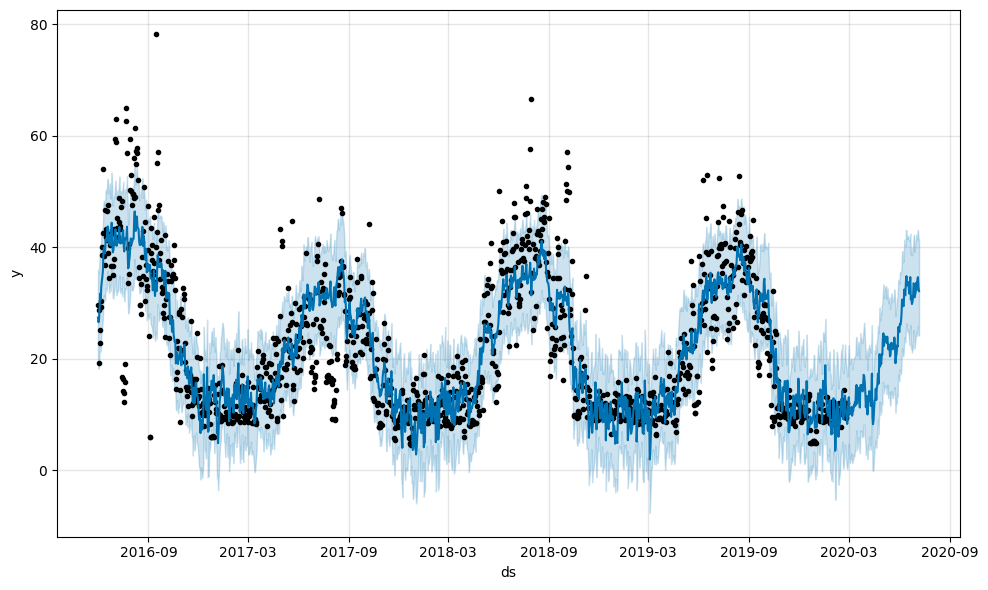

In [82]:
forecast = m.predict(future)
fig_4_1=m.plot(forecast)

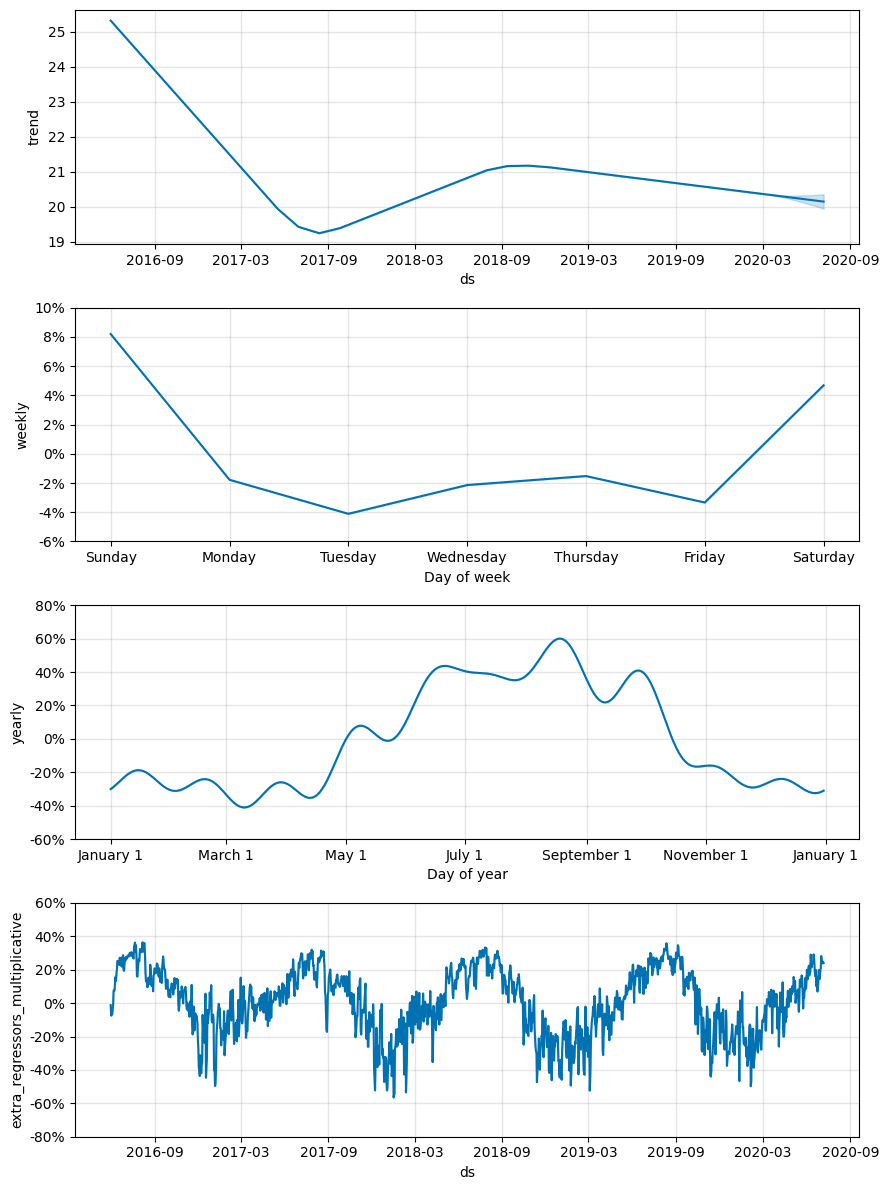

In [83]:
fig_4_2 = m.plot_components(forecast)

In [84]:
# Extraer los primeros 1369 valores de la columna 'yhat'
train_pred_prophet4 = forecast['yhat'].iloc[:1369].values

# Extraer los últimos 129 valores de la columna 'yhat'
test_pred_prophet4= forecast['yhat'].iloc[-129:].values


mae_train_prophet4 = mean_absolute_error(y_train, train_pred_prophet4)
mae_test_prophet4 = mean_absolute_error(y_test, test_pred_prophet4)

print(f'MAE Train: {mae_train_prophet4:.2f}')
print(f'MAE Test: {mae_test_prophet4:.2f}')

MAE Train: 4.88
MAE Test: 4.19


In [85]:
# calculamos errores de train y test
error_train_prophet4 = y_train - train_pred_prophet4
error_test_prophet4 = y_test - test_pred_prophet4
error_prophet4 = pd.concat([error_train_prophet4, error_test_prophet4])

# graficamos errores
fig_error_prophet = px.line(x = df.date, y=error_prophet4, title='Error en la predicción', color = df.set)
fig_error_prophet.show()

**Análisis de resultados**

A continuación, se muestran los resultados del MAE en todos los modelos que se generaron en esta parte de la tarea. 

| Modelo                | MAE train | MAE test |
|-----------------------|-----------|----------|
| Lineal                | 10.57     | 8.66     |
| Fourier               | 5.34      | 4.49     |
| Prophet_energia       | 4.82      | 4.93     |
| Prophet_regresores    | 4.76      | 4.52     |
| Prohet_regresores+lag | 4.75      | 4.58     |
| Prophet_optimizado    | 4.88      | 4.20     |

Se observa que el MAE más bajo se logra en la última parte, optimizando los parametros. El peor MAE se obtuvo con el modelo lineal. 

Cuando se empezó a usar Prophet, el peor resultado en el test fue cuando solo se uso la variable energia. Cuando se incluyeron las 5 variables en regresores mejoró. 

La dinámica del error ha ido cambiando levemente en los distintos modelos. 

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [4]:
#!pip install surprise

In [5]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [6]:
df_cervezas = pd.read_csv('cervezas.csv')
display(df_cervezas.head())

print(f'\nCantidad de observaciones: {df_cervezas.shape[0]}')

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA



Cantidad de observaciones: 295059


Haremos un pequeño análisis exploratorio

In [7]:
# Conteo de valores nulos
display(df_cervezas.isnull().sum())
print(f'\nCantidad de valores nulos totales: {df_cervezas.isnull().sum().sum()}')

userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64


Cantidad de valores nulos totales: 0


In [8]:
# Conteo de cantidad de cervezas dentro del dataset
display(df_cervezas['beerName'].value_counts())
print(f'\nCantidad de cervezas únicas: {df_cervezas["beerName"].nunique()}')

beerName
90 Minute IPA                          809
Old Rasputin Russian Imperial Stout    800
Sierra Nevada Celebration Ale          731
Stone Ruination IPA                    670
Two Hearted Ale                        660
                                      ... 
Olde Towne Hefeweizen                   20
High Class Broad                        20
Black Damnation IV - Coffee Club        20
Provisions Series: Tart Of Darkness     20
Batemans XXXB                           20
Name: count, Length: 3689, dtype: int64


Cantidad de cervezas únicas: 3689


In [9]:
# Cantidad de ciudadanos que participaron
display(df_cervezas['userId'].value_counts())
print(f'\nCantidad de ciudadanos participantes: {df_cervezas["userId"].nunique()}')

userId
35       9691
10099    8305
147      8142
140      6876
287      6143
         ... 
10902      20
8546       20
807        20
2760       20
4412       20
Name: count, Length: 706, dtype: int64


Cantidad de ciudadanos participantes: 706


In [10]:
# Descripción de la variable 'rating'
display(df_cervezas['rating'].describe())

count    295059.000000
mean          3.860367
std           0.702807
min           1.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

**¿Hay valores nulos?**

No, ya que ninguna columna tiene valores nulos

**¿Cuantos cervezas se estan evaluando?**

Se estan evaluando 3747 cervezas diferentes. 

**¿Cuantos ciudadanos participaron de esta evaluación?**
Participaron 706 ciudadanos. 

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

**1. Gráficos y estadística descriptiva**

In [11]:
# Cantidad de usuarios en el dataset
print(f'Cantidad de usuarios presentes: {df_cervezas["userId"].nunique()}')

# Cantidad de productos según ID y nombre
print(f'\nCantidad de productos según su ID: {df_cervezas["beerId"].nunique()}')
print(f'Cantidad de productos según su nombre: {df_cervezas["beerName"].nunique()}')
print(f'Cantidad de estilos de cerveza: {df_cervezas["beerStyle"].nunique()}')
print(f'Combinaciones únicas de nombre y tipo de cerveza: {df_cervezas.groupby(["beerName", "beerStyle"]).ngroups}')

# Cantidad de calificaciones
print(f'\nCantidad de calificaciones totales: {df_cervezas.shape[0]}')
print(f'Media de calificaciones: {df_cervezas["rating"].mean().round(2)}')
print(f'Mediana de calificaciones: {df_cervezas["rating"].median()}')

# Cantidad de calificaciones faltantes
print(f'Cantidad de calificaciones faltantes: {df_cervezas["rating"].isnull().sum()}')

Cantidad de usuarios presentes: 706

Cantidad de productos según su ID: 3747
Cantidad de productos según su nombre: 3689
Cantidad de estilos de cerveza: 101
Combinaciones únicas de nombre y tipo de cerveza: 3705

Cantidad de calificaciones totales: 295059
Media de calificaciones: 3.86
Mediana de calificaciones: 4.0
Cantidad de calificaciones faltantes: 0


Con estos primeros datos podemos ver que las $295.059$ observaciones fueron generadas por $706$ personas, habiendo quienes calificaron más cervezas que otros. Además se tiene una media de puntuación de $3.86$ para las cervezas.

Podríamos preguntarnos:

* ¿Quién realizó más calificaciones? ¿Quién menos?
* ¿Existen usuarios que hayan calificado más de una vez una misma cerveza?
* ¿Hay algún usuario que haya calificado todas las cervezas?

Además tenemos el caso de que, al parecer, habrían cervezas que comparten ID's, ya que la relación entre marca y tipo de cerveza no calza en relación 1:1 con los ID's disponibles. Para esto podríamos ver si las combinaciones `('beerName', 'beerStyle')` calzan en númerocon la cantidad de ID's disponibles. Si calzan, entonces cada una de las cervezas listadas posee un ID único no en nombre, sino que en nombre y estilo. Si los números no calzan, entonces tenemos cervezas de mismo nombre y estilo con diferentes ID's.

In [12]:
# Queremos saber si existen combinaciones de 'beerName' y 'beerStyle' que tienen asociados más de un 'beerId'
filtrados = df_cervezas.groupby(['beerName', 'beerStyle']).agg({'beerId': 'nunique'}).sort_values(by='beerId', ascending=False).head(29)
filtrados

beerId
beerName                 beerStyle                                  
Pale Ale                 American Pale Ale (APA)                   5
Oktoberfest              Märzen / Oktoberfest                      4
India Pale Ale           English India Pale Ale (IPA)              4
Nut Brown Ale            English Brown Ale                         4
Oatmeal Stout            Oatmeal Stout                             3
Saison Du BUFF           Saison / Farmhouse Ale                    3
Imperial IPA             American Double / Imperial IPA            3
IPA                      American IPA                              3
                         English India Pale Ale (IPA)              2
Saison                   Saison / Farmhouse Ale                    2
Phoenix Pale Ale         American Pale Ale (APA)                   2
Hefeweizen               Hefeweizen                                2
Pikeland Pils            German Pilsener                           2
Chocolate Porter         American Porter                           2
Freedom Of '78           American IPA                              2
Porter                   English Porter                            2
Bière De Mars            Bière de Garde                            2
CoCoNut Porter           American Porter                           2
Chocolate Stout          American Stout                            2
Hoptimus Prime           American Double / Imperial IPA            2
Porter                   American Porter                           2
Double Chocolate Stout   American Double / Imperial Stout          2
India Pale Ale           American IPA                              2
Harvest Ale              Extra Special / Strong Bitter (ESB)       2
Imperial Stout           Russian Imperial Stout                    2
                         American Double / Imperial Stout          2
Big Swell IPA            American IPA                              2
Kilkenny Irish Cream Ale Irish Red Ale                             2
Brown Ale                English Brown Ale                         2

Acá podemos ver que existen diferentes marcas y tipos de cervezas que no poseen un ID único, por lo que podríamos caer en el error de considerar dos cervezas como disintas cuando en verdad sólo tienen ID distinto. Es por esto que debemos guiarnos por la combinación entre marca y tipo de cerveza más que por ID. La otra solución sería cambiar los ID diferentes para una misma combinación, quedándonos con la primera aparición. Esto último es lo que haremos para estudiar el dataset.

In [13]:
# Reemplazar los valores diferentes de 'beerId' de una misma combinación de 'beerName' y 'beerStyle' por la primera aparición que se tenga
df_cervezas['beerId'] = df_cervezas.groupby(['beerName', 'beerStyle'])['beerId'].transform('first')

print(f'Cantidad de productos según su ID: {df_cervezas["beerId"].nunique()}')
print(f'Cantidad de productos según su nombre: {df_cervezas["beerName"].nunique()}')
print(f'Cantidad de estilos de cerveza: {df_cervezas["beerStyle"].nunique()}')
print(f'Combinaciones únicas de nombre y tipo de cerveza: {df_cervezas.groupby(["beerName", "beerStyle"]).ngroups}')

Cantidad de productos según su ID: 3705
Cantidad de productos según su nombre: 3689
Cantidad de estilos de cerveza: 101
Combinaciones únicas de nombre y tipo de cerveza: 3705


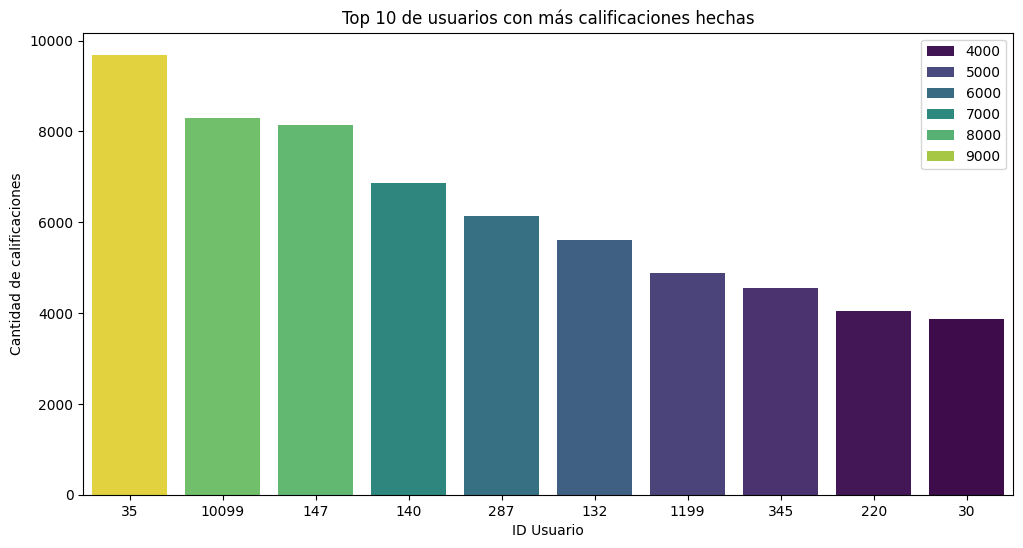

In [14]:
# Top 10 de usuarios con más calificaciones hechas
top_10 = df_cervezas['userId'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values, order=top_10.index, palette='viridis', hue=top_10.values)
plt.title('Top 10 de usuarios con más calificaciones hechas')
plt.xlabel('ID Usuario')
plt.ylabel('Cantidad de calificaciones')
plt.show()

Hay un usuario que ha calificado más de $9.000$ cervezas, siendo el universo de ellas $3.689$, lo cual nos indica que esta persona ha evaluado, por lo menos una cerveza más de una vez.

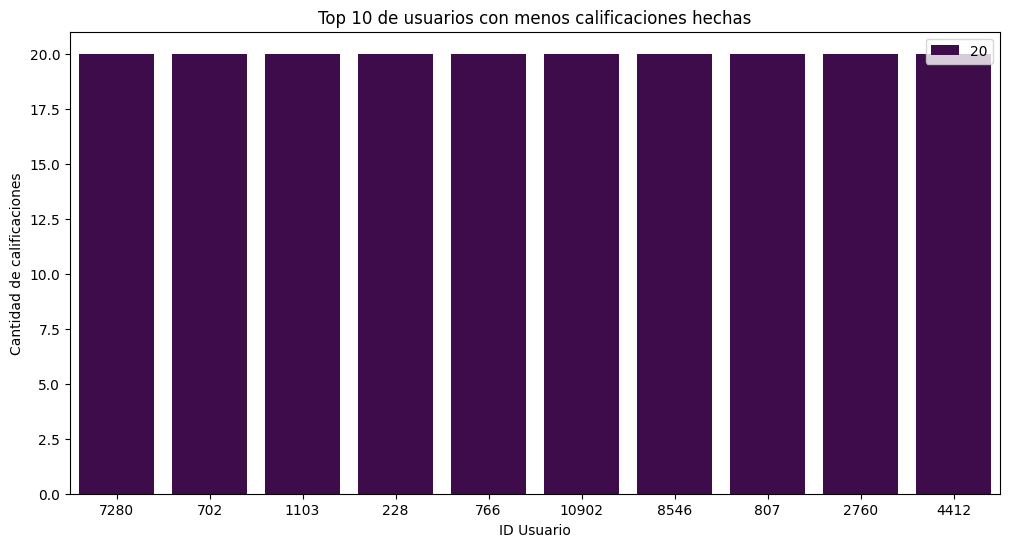

In [15]:
# Ranking de usuarios con menos calificaciones hechas
bottom_10 = df_cervezas['userId'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10.index, y=bottom_10.values, order=bottom_10.index, palette='viridis', hue=bottom_10.values)
plt.title('Top 10 de usuarios con menos calificaciones hechas')
plt.xlabel('ID Usuario')
plt.ylabel('Cantidad de calificaciones')
plt.show()

Los usuarios que menos han calificado tienen el mismo número de calificaciones, por lo que podemos asegurar que todos los usuarios han calificado a lo menos $20$ veces las cervezas ofrecidas, pero no sabemos si calificaron una misma cerveza o diferentes (pero no nos interesa responder esta pregunta).

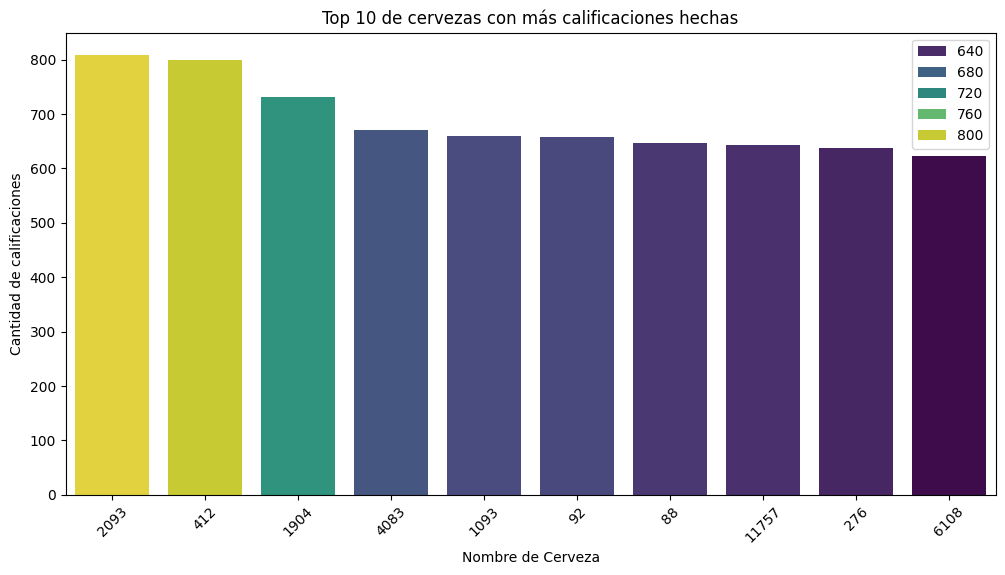

In [16]:
# Ranking de cervezas con más calificaciones
top_beers = df_cervezas['beerId'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_beers.index, y=top_beers.values, order=top_beers.index, palette='viridis', hue=top_beers.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con más calificaciones hechas')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Cantidad de calificaciones')
plt.show()

Podemos observar que hay una cerveza que ha sido evaluada más veces que el resto, pero este gráfico representa evaluaciones en general, sin considerar si fueron evaluadas por la mayoría de las personas o en verdad es una única persona que sólo tomó esta cerveza. En el siguiente gráfico podemos ver esta tendencia:

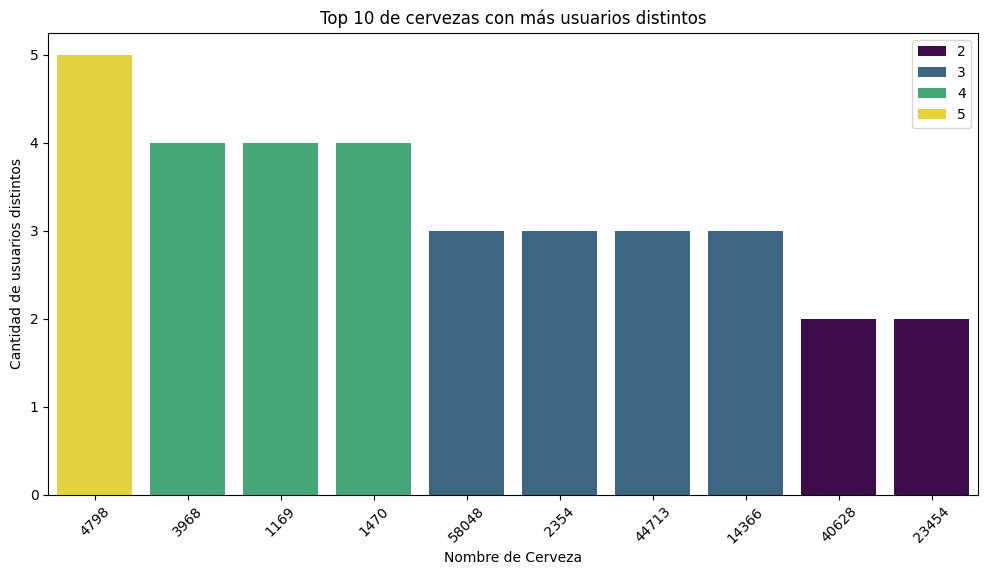

In [17]:
# Ranking de cervezas con más gama de usuarios distintos
top_beers_dist = df_cervezas.groupby('beerId')['userId'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_beers_dist.index, y=top_beers_dist.values, order=top_beers_dist.index, palette='viridis', hue=top_beers_dist.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con más usuarios distintos')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Cantidad de usuarios distintos')
plt.show()

Podemos ver que las cervezas calificadas por más gente en verdad no es por tanta gente, siendo la de `beerId = 4798` la más calificada por los usuarios (distintos todos entre ellos), pero es diferente a la primera cerveza más calificada en general (`beerId = 2093` con $809$). Para verificar esto, veamos cuáles son los usuarios que más han calificado una misma cerveza.

In [18]:
# Contamos las veces que un usuario ha calificado una cerveza (cada una de ellas)
conteo_repeticiones = df_cervezas.groupby(['beerId', 'userId']).size().reset_index(name='repeticiones')

# Vemos el usuario que más ha calificado cada una de las cervezas y lo ordenamos
usuario_top_por_cerveza = conteo_repeticiones.loc[conteo_repeticiones.groupby('beerId')['repeticiones'].idxmax()]
usuario_top_por_cerveza = usuario_top_por_cerveza.sort_values(by='repeticiones', ascending=False)

print(usuario_top_por_cerveza.head(10))

      beerId  userId  repeticiones
828     2093   10099           809
225      412     112           800
776     1904     140           731
1218    4083     147           670
484     1093     287           660
47        92     147           658
44        88     147           647
1648   11757    1199           643
148      276     140           637
1373    6108   10099           623


Con este ranking podemos ver que hay cervezas que se consumen mayoritariamente por un único usuario. Además este ranking se condice con el obtenido en primera instancia.

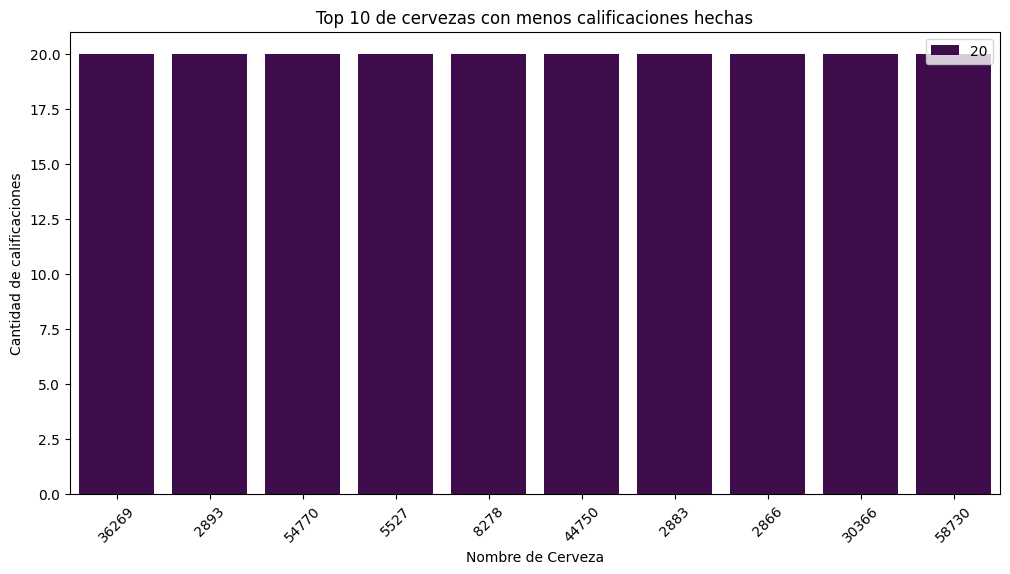

In [19]:
# Ranking de cervezas con menos calificaciones
bottom_beers = df_cervezas['beerId'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_beers.index, y=bottom_beers.values, order=bottom_beers.index, palette='viridis', hue=bottom_beers.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con menos calificaciones hechas')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Cantidad de calificaciones')
plt.show()

Al igual que en el caso anterior, podemos ver que las cervezas con menos calificaciones tienen a lo menos 20 calificaciones, pero sin saber si vienen de un mismo usuario o de diversos usuarios, sin mostrar una tendencia general de consumo.

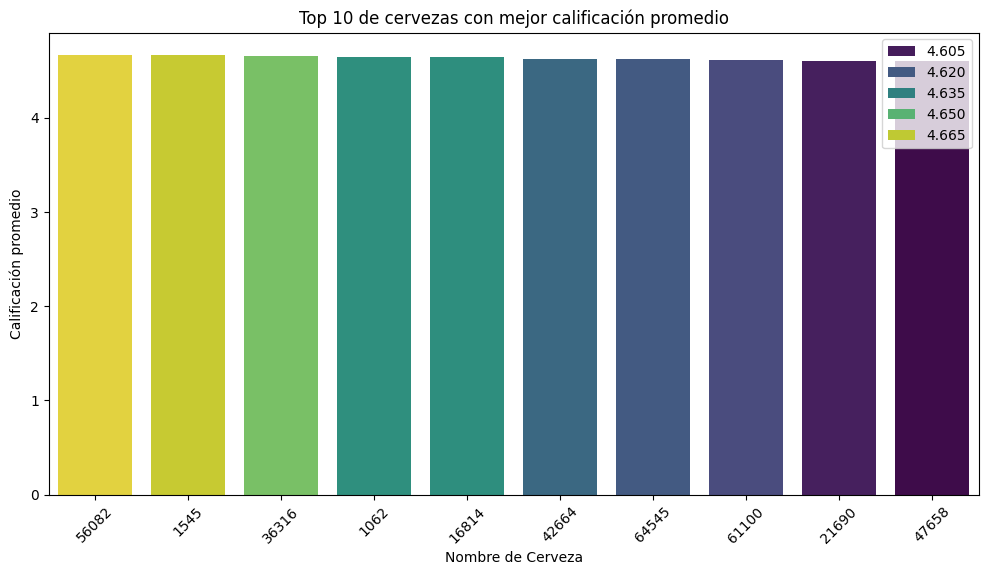

In [20]:
# Calificación promedio de cervezas (top 10)
mean_beers = df_cervezas.groupby('beerId')['rating'].mean().sort_values(ascending = False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_beers.index, y=mean_beers.values, order=mean_beers.index, palette='viridis', hue=mean_beers.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con mejor calificación promedio')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Calificación promedio')
plt.show()

Podemos ver que en el top 10 de cervezas, tienen una calificación promedio bastante parecida, sobrepasando el $4.6$ de calificación, pero ninguna teniendo una calificación perfecta.

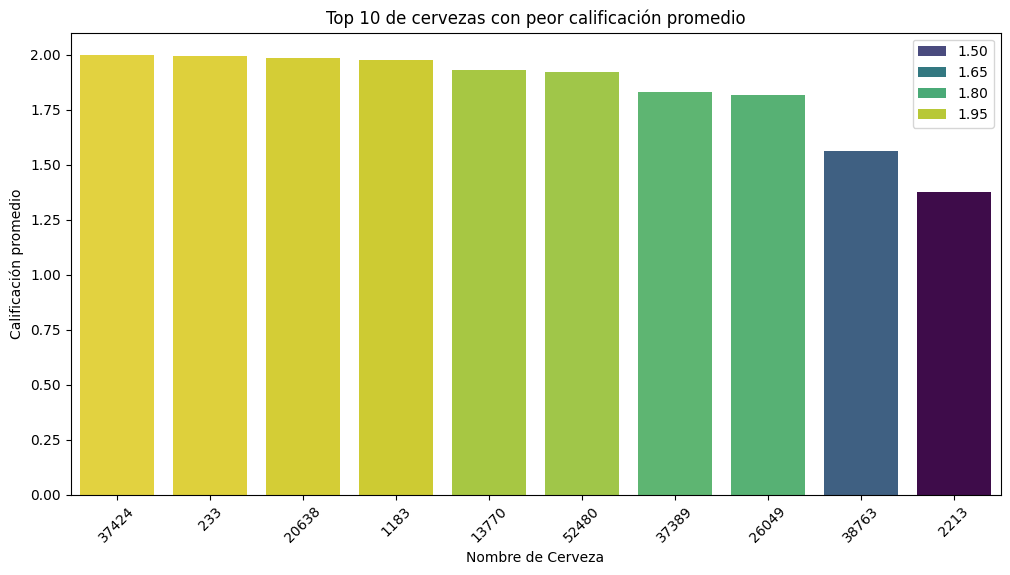

In [21]:
# Calificación promedio de cervezas (bottom 10)
mean_beers = df_cervezas.groupby('beerId')['rating'].mean().sort_values(ascending = False).tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_beers.index, y=mean_beers.values, order=mean_beers.index, palette='viridis', hue=mean_beers.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con peor calificación promedio')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Calificación promedio')
plt.show()

Por otro lado, las 10 cervezas peor calificadas oscilan entre el $1.5$ y $2.0$ de calificación.

Para las calificaciones faltantes, primero podríamos decir que, según el dataset, cada usuario calificó la cerveza que tomó (se traduce en ausencia de valores NaN en la columna 'rating'), pero no necesariamente cada usuario calificó todas las cervezas. Esto nos deja algunos huecos en las calificaciones globales al ver la matriz usuario-producto que se pueden traducir en NaN. Si contamos estos valores NaN llegamos al siguiente valor:


In [22]:
# Cantidad de cervezas que cada ciudadano probó visto en una matriz
df_cervezas_pivot = pd.pivot_table(df_cervezas, values='rating', index='userId', columns='beerId', aggfunc='count')

# Cantidad de valores nulos dentro de la matriz
print(f'Cantidad de calificaciones faltantes: {df_cervezas_pivot.isnull().sum().sum()}')

Cantidad de calificaciones faltantes: 2611983


Es decir, si juntamos a todos los usuarios, tenemos $2.611.983$ combinaciones de usuario-cerveza sin una calificación puesta.

**2. Datos a matrix**

In [23]:
display(df_cervezas_pivot)

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100.0,230.0,146.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

**1. Nuevo DataFrame**

In [24]:
df_cervezas_drop = df_cervezas.drop(columns = ['userId', 'rating', 'beerId']).copy()
df_cervezas_drop.drop_duplicates(inplace = True)
df_cervezas_drop.reset_index(drop = True, inplace = True)

df_cervezas_drop

,beerName,beerStyle
0,Mai Bock,Maibock / Helles Bock
1,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,Stone Ruination IPA,American Double / Imperial IPA
3,Noël Des Géants,Herbed / Spiced Beer
4,Sierra Nevada Celebration Ale,American IPA
...,...,...
3700,Red,American Amber / Red Ale
3701,Splinter Black,American Double / Imperial Stout
3702,Wittekerke Rosé,Fruit / Vegetable Beer
3703,Hambleton Nightmare (Extra Stout Porter),English Porter


**2. Bag Of Words**

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Se crea el vectorizador
vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=10)

# Se aplica el vectorizador al texto
bow = vectorizer.fit_transform(df_cervezas_drop['beerStyle']).toarray()

# Se crea un DataFrame con los resultados
df_bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
df_bow

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3701,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3702,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3. Top cervezas similares**

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# calculamos la similitud coseno de cada vector generado contra el resto
cosine_sim = cosine_similarity(df_bow, df_bow)

In [27]:
def similar_beers(df, beer_name, k = 5):
  '''
    Función que recibe un nombre de cerveza y retorna las k cervezas más similares a la cerveza ingresada.

    Args
        df: DataFrame con las cervezas.
        beer_name: Nombre de la cerveza a buscar.
        k: Cantidad de cervezas similares a retornar.

    Returns
        top_beers: Lista con las k cervezas más similares.
  '''

  # Revisamos si la cerveza ingresada se encuentra en el dataset
  assert beer_name in df["beerName"].values, "Esta cerveza no está en el dataset. Por favor ingrese otra."

  # Obtenemos el índice de la cerveza ingresada
  idx = df[df["beerName"] == beer_name].index[0]

  # Obtenemos la similitud coseno de la cerveza ingresada con el resto
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Ordemanos los resultados obtenidos
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Obtenemos el puntaje de similitud de las k cervezas más similares
  sim_scores = sim_scores[1:k+1]

  # Obtenemos los índices de las cervezas más similares
  beer_indices = [i[0] for i in sim_scores]

  # Retornamos el top de cervezas
  return df["beerName"].iloc[beer_indices].values

In [28]:
similar_beers(df = df_cervezas_drop, beer_name = 'Chocolate Porter')

array(['Great Lakes Edmund Fitzgerald Porter', 'Perseus Porter',
       'Southampton Imperial Porter',
       'Kona Coffee Macadamia Coconut Porter', 'Black Marlin Porter'],
      dtype=object)

**4. Mejor evaluada y similares**

In [29]:
# Cerveza mejor evaluada por el usuario 'userId = 100' (Homero)
df_cervezas[df_cervezas['userId'] == 100].sort_values(by = 'rating', ascending = False).head(1)

,userId,beerId,rating,beerName,beerStyle
178444,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale


In [30]:
# Cervezas similares a la mejor evaluada por el usuario 'userId = 100' (Homero)
similar_beers(df = df_cervezas_drop, beer_name = "McNeill's Firehouse Amber Ale")

array(['Grail Ale', "Santa's Private Reserve Ale",
       'Hemp Hop Rye Amber Ale', 'Autumn Fest', 'Red Rocket Ale'],
      dtype=object)

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

**1. Transformación de Dataset**

In [31]:
import surprise
from surprise import Reader, Dataset

In [32]:
reader = Reader(rating_scale = (1, 5))

df_collaborative = df_cervezas[['userId', 'beerId', 'rating']].copy()
dataset = Dataset.load_from_df(df_collaborative, reader)

El orden en como recibe `surprise` los nombres de los identificadores del dataset importa, ya que por defecto, `surprise` espera que el usuario le entregue los datos en el orden (`usuario`, `item`, `rating`). Si le pasáramos estos elementos en un orden invertido, el modelo asumirá cosas que no son. Por ejemplo, si el orden que ingresamos es (`rating`, `usuario`, `item`), entonces estaríamos mapeando usuarios a cervezas, generando así relaciones incorrectas, afectando los resultados del modelo.

**2. Conjunto de entrenamiento y de prueba**

In [33]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(dataset, test_size = 0.3, random_state = 33)

**3. Modelo KNN basado en usuarios**

In [34]:
# Queremos usar un modelo KNN basado en usuarios, usando la similitud coseno
from surprise import KNNBasic

sim_options = {
    'name': 'cosine',
    'user_based': True
}

model = KNNBasic(sim_options = sim_options)

model.fit(trainset)
predictions = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


**4. Cálculo de `MAE`**

In [35]:
from surprise.accuracy import mae
mae(predictions)

df_predictions = pd.DataFrame(predictions)
display(df_predictions.head(10))

MAE:  0.4659


,uid,iid,r_ui,est,details
0,17981,67483,4.0,4.384615,"{'actual_k': 13, 'was_impossible': False}"
1,30,24357,3.5,3.587500,"{'actual_k': 40, 'was_impossible': False}"
2,42,593,4.5,3.900000,"{'actual_k': 40, 'was_impossible': False}"
3,132,355,4.0,3.987500,"{'actual_k': 40, 'was_impossible': False}"
4,35,67044,4.0,3.300000,"{'actual_k': 40, 'was_impossible': False}"
5,10097,44755,4.0,3.987500,"{'actual_k': 40, 'was_impossible': False}"
6,45,836,4.5,3.762500,"{'actual_k': 40, 'was_impossible': False}"
7,200,630,3.5,3.300000,"{'actual_k': 40, 'was_impossible': False}"
8,22,1090,4.0,3.587500,"{'actual_k': 40, 'was_impossible': False}"
9,252,731,5.0,4.362500,"{'actual_k': 40, 'was_impossible': False}"


Acá podemos ver que, por ejemplo para la primera observación, el usuario $17981$ calificó la cerveza de ID $67483$ con una puntuación igual a $4.0$, valor que el modelo intentó predecir llegando a un valor estimado de $4.38$, lo cual no está mal, pero es mejorable. Así como también hay otras observaciones que tienen estimaciones más o menos cercadas a las puntuaciones reales. El `MAE` obtenido es menor a $0.5$, lo cual nos indica que el modelo tiene un comportamiento bastante aceptable al minimizar el error absoluto medio, desviando entonces aproximadamente $0.47$ puntos de las calificaciones reales.

Otro punto adicional de los resultados es que `actual_k` muestra que el valor de vecinos efectivos usados para la predicción fue de 13, teniendo una estimación no imposible de obtener (`was_impossible: False`)

**5. Modelo KNN basado en productos**

In [36]:
# Entrenamiento de modelo basado en productos
sim_options_2 = {
    'name': 'cosine',
    'user_based': False
}

model_2 = KNNBasic(sim_options = sim_options_2)

model_2.fit(trainset)
predictions_2 = model_2.test(testset)

# Cálculo de 'MAE'
mae(predictions_2)

df_predictions_2 = pd.DataFrame(predictions_2)
display(df_predictions_2.head(10))

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4657


,uid,iid,r_ui,est,details
0,17981,67483,4.0,4.237769,"{'actual_k': 40, 'was_impossible': False}"
1,30,24357,3.5,3.587500,"{'actual_k': 40, 'was_impossible': False}"
2,42,593,4.5,3.900000,"{'actual_k': 40, 'was_impossible': False}"
3,132,355,4.0,3.987500,"{'actual_k': 40, 'was_impossible': False}"
4,35,67044,4.0,3.300000,"{'actual_k': 40, 'was_impossible': False}"
5,10097,44755,4.0,3.987500,"{'actual_k': 40, 'was_impossible': False}"
6,45,836,4.5,3.762500,"{'actual_k': 40, 'was_impossible': False}"
7,200,630,3.5,3.300000,"{'actual_k': 40, 'was_impossible': False}"
8,22,1090,4.0,3.587500,"{'actual_k': 40, 'was_impossible': False}"
9,252,731,5.0,4.362500,"{'actual_k': 40, 'was_impossible': False}"


Si comparamos entonces el segundo modelo basado en prodctos, se obtuvo prmeramente un `MAE = 0.4657`, el cual es levemente menor al primer modelo. Podríamos decir que este modelo es mejor que el primero utilizado, pero en términos de tiempo de ejecución fue muchom ás lento, bordeando los 2 minutos en entrenamiento, comparado a los 0.1 segundos que alcanzó el primer modelo.

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

**1. Entrenar modelo `NMF`**

In [37]:
from surprise import NMF

model_3 = NMF(random_state = 33)
model_3.fit(trainset)
predictions_3 = model_3.test(testset)

**2. Cálculo de `MAE`**

In [38]:
# Cálculo de 'MAE'
mae(predictions_3)

df_predictions_3 = pd.DataFrame(predictions_3)
display(df_predictions_3.head(10))

MAE:  0.4852


,uid,iid,r_ui,est,details
0,17981,67483,4.0,4.116308,{'was_impossible': False}
1,30,24357,3.5,3.638330,{'was_impossible': False}
2,42,593,4.5,3.846192,{'was_impossible': False}
3,132,355,4.0,4.144257,{'was_impossible': False}
4,35,67044,4.0,3.418304,{'was_impossible': False}
5,10097,44755,4.0,3.900666,{'was_impossible': False}
6,45,836,4.5,3.873269,{'was_impossible': False}
7,200,630,3.5,3.354754,{'was_impossible': False}
8,22,1090,4.0,3.608909,{'was_impossible': False}
9,252,731,5.0,4.249439,{'was_impossible': False}


**3. Entrenar modelo `SVD`**

In [39]:
from surprise import SVD

model_4 = SVD(random_state = 33)
model_4.fit(trainset)
predictions_4 = model_4.test(testset)

**4. Cálculo de `MAE`**

In [40]:
mae(predictions_4)

df_predictions_4 = pd.DataFrame(predictions_4)
display(df_predictions_4.head(10))

MAE:  0.4629


,uid,iid,r_ui,est,details
0,17981,67483,4.0,4.302329,{'was_impossible': False}
1,30,24357,3.5,3.469404,{'was_impossible': False}
2,42,593,4.5,4.043051,{'was_impossible': False}
3,132,355,4.0,4.099282,{'was_impossible': False}
4,35,67044,4.0,3.334818,{'was_impossible': False}
5,10097,44755,4.0,3.980883,{'was_impossible': False}
6,45,836,4.5,3.868731,{'was_impossible': False}
7,200,630,3.5,3.310915,{'was_impossible': False}
8,22,1090,4.0,3.697675,{'was_impossible': False}
9,252,731,5.0,4.508266,{'was_impossible': False}


**5. Comparación de modelos**

Ya con los resultados de ambos modelos, en términos de error absoluto el que mejor se comporta es el que está basado en `SVD` al alcanzar `MAE = 0.46` comparado con el `MAE = 0.48` del modelo basado en `NMF`, a la par de que también fue 2 segundos más rápido en entrenarse.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [58]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

**1. Implementación función `get_top_n()`**

In [43]:
from collections import defaultdict

# Aplicación y modificación de función vista en clases
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # Mapeo las predicciones a cada usuario
    top_n = defaultdict(list)

    # Uso un conjunto temporal para marcar recomendaciones ya vistas
    seen_items = defaultdict(set)

    for uid, iid, true_r, est, _ in predictions:
        # Si no he visto el item, lo agrego.
        if iid not in seen_items[uid]:
            top_n[uid].append((iid, est))
            seen_items[uid].add(iid)  # Añado el item al conjunto de vistos

    # Ordeno las predicciones para cada usuario en orden decreciente.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [51]:
top_3 = get_top_n(predictions_4, n = 3)
top_3

defaultdict(list,
            {17981: [(47022, 4.4371996435857834),
              (67483, 4.302329306663668),
              (46366, 4.228081079740372)],
             30: [(43903, 4.074314532042041),
              (22352, 4.003728811185698),
              (2894, 3.958365378483199)],
             42: [(141, 4.227920635165889),
              (57817, 4.191613438461268),
              (44091, 4.071593797559023)],
             132: [(56973, 4.208731713916333),
              (60694, 4.165032861877742),
              (12690, 4.154245502007693)],
             35: [(54904, 4.106336512641589),
              (104, 4.043046598314316),
              (34834, 4.035632038668752)],
             10097: [(44755, 3.980883438720493),
              (24064, 3.961200371171385),
              (314, 3.9380389385247843)],
             45: [(51480, 4.176257914935338),
              (25851, 4.134569965897556),
              (47678, 4.064355697156334)],
             200: [(39588, 3.946550499442865),
              (2

In [52]:
# Busco las predicciones para el usuario 'userId' = 100
top_3[100]

[(1393, 3.923498134140994),
 (325, 3.8488760381051557),
 (1814, 3.666013528560908)]

**2. Predicciones de rating para 5 cervezas**

La forma que mejor se nos ocurre es hacer una función que calcule de manera secuencial lo siguiente:

1. Obtener cervezas que el usuario no ha calificado.
2. De esa lista seleccionar $k$ cervezas de manera aleatoria.
3. Generar predicciones sobre esas cervezas.

In [54]:
import random

def predicciones_cervezas_no_puntuadas(model, user_id, df, k=5):
    """
    Predice las calificaciones para N cervezas aleatorias que no han sido evaluadas por el usuario ingresado
    
    Args:
        model: El mejor modelo entrenado (o el que se prefiera en verdad).
        user_id: El ID del usuario para el cual predecir calificaciones.
        df: El dataset original con todas las calificaciones (para obtener nombres de cervezas).
        k: Número de cervezas no evaluadas para predecir. Por defecto es 5.
    
    Returns:
        predictions: Una lista de tuples de la forma (beerId, ratingPredict).
    """

    # Obtener todas las cervezas en el dataset
    all_beers = set(df['beerId'].unique())
    
    # Obtener cervezas que el usuario ya evaluó
    rated_by_user = set(df[df['userId'] == user_id]['userId'])
    
    # Obtener cervezas que el usuario NO ha evaluado
    unrated_beers = list(all_beers - rated_by_user)
    
    # Seleccionar 5 cervezas al azar del conjunto de no evaluadas
    random_beers = random.sample(unrated_beers, k)
    
    # Predecir las calificaciones para esas cervezas
    predictions = []
    for beer_id in random_beers:
        pred = model.predict(user_id, beer_id)
        predictions.append((beer_id, pred.est))
    
    return predictions

In [57]:
# Llamar a la función usando el modelo entrenado y el dataframe original
unrated_predictions = predicciones_cervezas_no_puntuadas(model_4, user_id=100, df=df_cervezas, k=5)

# Mostrar las predicciones
print("Predicciones de calificaciones para 5 cervezas no evaluadas por Carl:")
unrated_predictions

Predicciones de calificaciones para 5 cervezas no evaluadas por Carl:


[(48978, 3.549414422721302),
 (44085, 3.5204448673777198),
 (43684, 3.889892316767165),
 (45275, 3.57021075957023),
 (920, 3.6705813600611132)]

**3. Promedios de `precision` y `recall`**

In [60]:
precision_modelo_4, recall_modelo_4 = precision_recall_at_k(predictions_4)
print(f'Precisión modelo SVM: {precision_modelo_4[100]}')
print(f'Recall modelo SVM: {recall_modelo_4[100]}')

Precisión modelo SVM: 0.9
Recall modelo SVM: 0.25


Si nos centramos en `precision` y `recall` obtenidos para el usuario que estamos analizando (`'userId' = 100`), este modelo:

* Con un `precision@10 = 0.9`, de todas las recomendaciones que se le están haciendo, una gran parte de ellas son relevantes para el usuario. En este caso, 9 de cada 10 recomendaciones resultan relevantes.
* Con un `recall@10 = 0.25`, vemos desde el otro lado que, dentro del universo de cervezas que son relevantes para el usuario, muy pocas de ellas son recomendadas por el modelo, es decir, cada 4 cervezas que son relevantes, se logra recomendar 1.

Esto refleja el *trade-off* que existe al implementar este tipo de sistemas, en donde en este caso el modelo implementado lo que busca es darle al usuario recomendaciones de cervezas de las cuales está seguro de que serán de su agrado (`precision` alto), sin tener en cuenta de que el usuario puede que busque otras cervezas que se escapen de su cotidiano, pero que pueden ser de igual manera de su agrado (`recall` bajo).

**4. Cálculos de `precision` y `recall` parte 1**

In [78]:
precision_carl = []
recall_carl = []

for k in range(3, 26, 1):
    p, r = precision_recall_at_k(predictions_4, k = k)
    precision_carl.append(p[100])
    recall_carl.append(r[100])

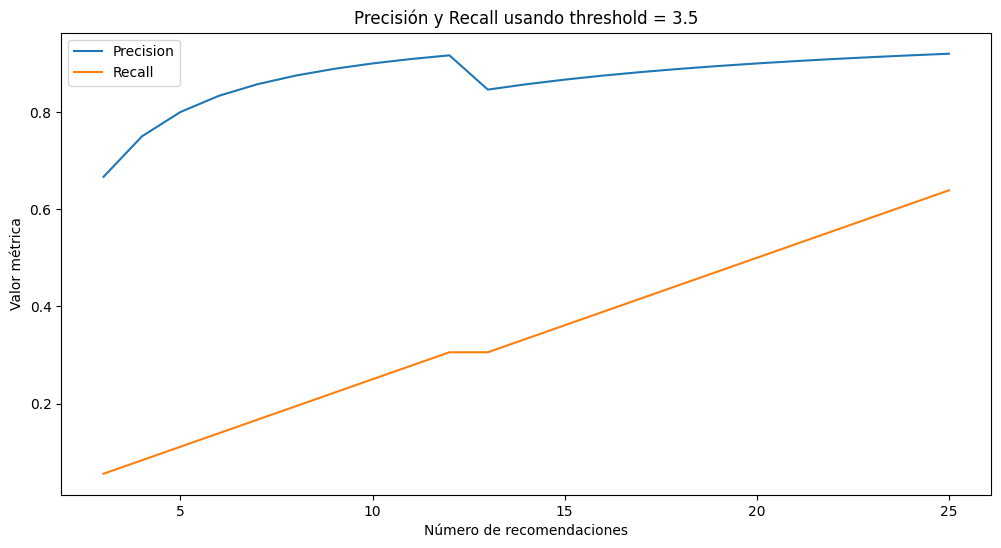

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(range(3, 26, 1), precision_carl, label = 'Precision')
plt.plot(range(3, 26, 1), recall_carl, label = 'Recall')
plt.xlabel('Número de recomendaciones')
plt.ylabel('Valor métrica')
plt.title('Precisión y Recall usando threshold = 3.5')
plt.legend()
plt.show()

En este caso podemos ver que, partiendo con un número de recomendaciones relevantes bajo, el modelo buscará darle recomendaciones que sean mucho más seguras de su agrado (es decir, muy similares a su actual preferencia), dejando de lado las que se escapan de su común, pero que pueden ser también de su agrado. Esto cambia a medida que le damos más recomendaciones ya que, al existir un mayor catálogo de ofrecimiento, el modelo comienza a darle más recomendaciones de cervezas que son relevantes, pero que no necesariamente el usuario vaya a consumir de manera periódica.

**5. Cálculos de `precision` y `recall` parte 2**

In [76]:
precision_carl = []
recall_carl = []

for threshold in np.linspace(3.5, 4.5, 11):
    p, r = precision_recall_at_k(predictions_4, threshold = threshold)
    precision_carl.append(p[100])
    recall_carl.append(r[100])

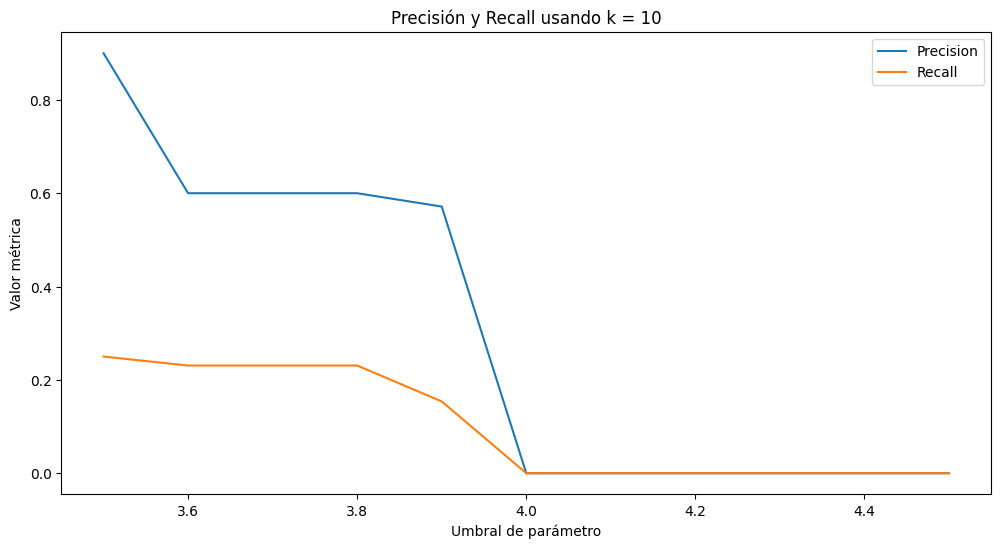

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(3.5, 4.5, 11), precision_carl, label = 'Precision')
plt.plot(np.linspace(3.5, 4.5, 11), recall_carl, label = 'Recall')
plt.xlabel('Umbral de parámetro')
plt.ylabel('Valor métrica')
plt.title('Precisión y Recall usando k = 10')
plt.legend()
plt.show()

En este otro caso, si variamos el valor del `threshold`, vemos que el poder de recomendación del modelo se ve empobrecido ya que, al aumntar el umbral de recomendación, suponemos que las cervezas que se le deben recomendar al usuario deben ser cada vez más exactas a lo que suele consumir (por no decir la misma cerveza). Ya con un umbral sobre $4.0$, es casi imposible darle recomendaciones que vayan a ser de su agrado al haber aumentado la exigencia de las predicciones de puntuación de cada cerveza.

**6. Estimación de ratings faltantes**

In [81]:
# Creamos las predicciones de los datos faltantes
full_trainset = dataset.build_full_trainset()
missing_ratings = full_trainset.build_anti_testset()
predictions = model_4.test(missing_ratings)

In [82]:
# Lo traspaso a un dataframe de Pandas
predictions_list = [(pred.uid, pred.iid, pred.est) for pred in predictions]
df_predictions = pd.DataFrame(predictions_list, columns=['userId', 'beerId', 'rating'])

# Fusiono los dataset sin predicciones y con predicciones usando concatenación
df_cervezas_sin_pred = df_cervezas[['userId', 'beerId', 'rating']]
df_cervezas_con_pred = pd.concat([df_cervezas_sin_pred, df_predictions])

# Creo la matriz (usuario, producto) con las puntuaciones
df_cervezas_pivot = pd.pivot_table(df_cervezas_con_pred, values='rating', index='userId', columns='beerId', aggfunc='mean')

In [83]:
display(df_cervezas_pivot)

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,3.680689,4.027114,3.618027,3.894057,3.740398,3.788166,3.981534,3.765763,3.638217,3.979324,...,3.762779,4.120254,3.795671,3.978438,3.840713,4.013005,3.871378,4.236082,3.915211,3.682492
3,3.395000,3.765217,3.256849,3.478261,3.446461,3.482141,3.627150,3.560689,3.441614,3.718422,...,3.496665,3.928649,3.520583,3.857940,3.509569,3.774476,3.664721,3.875362,3.719914,3.490063
4,3.782544,4.143557,3.740695,3.831032,3.791908,3.835159,3.981455,3.896948,3.828590,4.009783,...,3.832286,4.237470,3.932797,4.156164,3.906558,4.128389,3.983473,4.241840,4.082528,3.835512
5,3.795092,4.051527,3.592751,3.857494,3.757730,3.431818,3.820063,3.669406,3.631599,3.863161,...,3.781440,4.087430,4.018511,4.070698,3.821253,4.096819,3.864074,4.216507,4.100855,3.845040
6,3.723259,4.147575,3.555736,3.651220,3.755246,3.620747,3.892157,3.986458,3.549870,3.856664,...,3.639988,4.138319,3.846878,4.067179,3.682142,3.985870,3.987700,4.138530,3.856656,3.662056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,3.899386,4.088319,3.746706,3.871042,3.946274,3.783184,4.031480,3.894213,3.889792,4.046600,...,4.022213,4.310712,3.954102,4.083933,4.058880,4.120340,4.239272,4.345649,4.075791,3.772830
25317,3.591018,3.983080,3.439323,3.523008,3.605684,3.610115,3.844186,3.719580,3.675227,3.886957,...,3.635816,3.952884,3.882529,3.997416,3.789721,3.954063,3.853134,3.995287,3.876802,3.688048
25923,3.776068,4.142915,3.795731,3.877821,3.737112,3.650007,3.885001,3.750077,3.782383,4.180553,...,3.857568,4.282697,3.807661,4.258093,4.035697,4.017487,4.168946,4.247446,4.076695,3.756099


In [84]:
# Nos aseguramos de que no existan nulos
print(f'Cantidad de calificaciones faltantes: {df_cervezas_pivot.isnull().sum().sum()}')

Cantidad de calificaciones faltantes: 0


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
